# Dementia Dataset
---

## Import Packages & Set Up
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

palette = ['#800080', '#FF69B4', '#8A2BE2', '#DA70D6', '#9370DB', '#DDA0DD', '#BA55D3']
gradient_palette = sns.light_palette('#620080', as_cmap=True)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_theme(style="whitegrid", palette=palette)

## Import Data and Examine
---

In [2]:
df = pd.read_csv('data/dementia_data-MRI-features.csv')

In [3]:
print(df.shape)

(373, 15)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Statistical Summary
---

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [7]:
print ("Number of unique subjects = ",len(df['Subject ID'].unique()))

Number of unique subjects =  150


## Preparing the Data
---

### Data Types
---

To make the data easier to use, we must change the non-numeric columns to be represented numerically.

In [8]:
df['M/F'] = df['M/F'].map({'M': 0, 'F': 1})
df['Hand'] = df['Hand'].map({'R': 0, 'L': 1})

### Target Examination
---

<Axes: xlabel='Group', ylabel='count'>

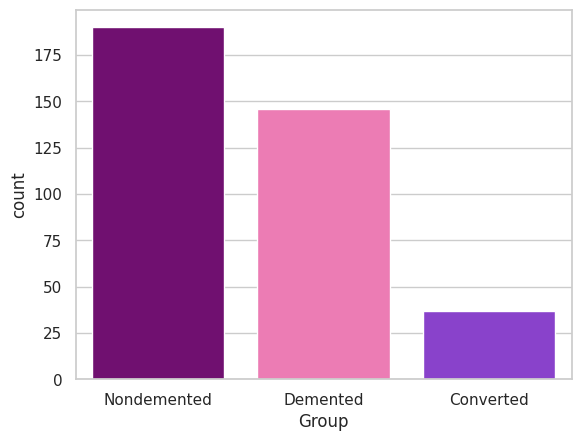

In [9]:
sns.countplot(x=df['Group'], palette=palette)

In [10]:
df.Group.value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

The converted category consists of 37 records for 14 subjects.

In [11]:
df.loc[df.Group == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,1,0,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,1,0,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,1,0,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,0,0,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,0,0,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,0,0,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,1,0,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,1,0,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,1,0,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,1,0,71,16,1.0,27.0,0.0,1289,0.771,1.362


All those classified as Converted were Nondemented on their first visit and Demented on the final visit according to the data card.

We can hence resolve this category into Nondemented (first visit) and Demented (last visit),dropping nine records which lie between the first and final visits.

In [12]:
nondemented = [33,36,57,81,114,194,218,245,261,271,273,295,297,346]
demented = [35,38,59,83,115,195,220,246,265,272,274,296,298,348]
drop = [34,37,58,82,219,262,263,264,347]

In [13]:
for n in nondemented:
    df.Group.iloc[n] = 'Nondemented'
for n in demented:
    df.Group.iloc[n] = 'Demented'

In [14]:
df = df.drop(index =[34,37,58,82,219,262,263,264,347])

Now we can drop the unneeded columns.

In [15]:
df = df.drop(columns = ['Subject ID','MRI ID'])

Now we can visualise the target following these changes.

<Axes: xlabel='Group', ylabel='count'>

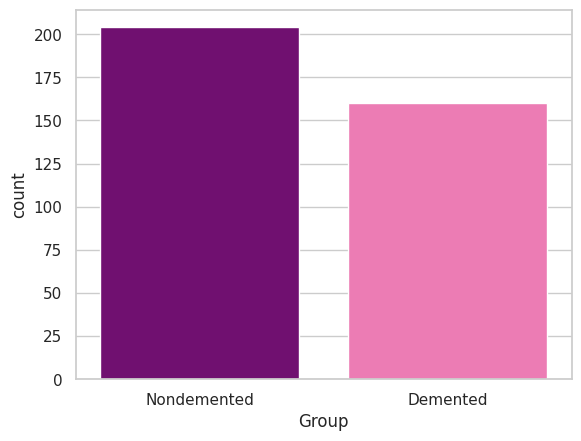

In [16]:
sns.countplot(x=df['Group'], palette=palette)

In [17]:
df.Group.value_counts()

Group
Nondemented    204
Demented       160
Name: count, dtype: int64

### Missing Values
---

In [18]:
df.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

Visualise the missing data to see if there is a pattern.

In [19]:
df[df.isnull().any(axis=1)]

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,1,0,0,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,0,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,0,0,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,Demented,1,0,0,0,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,Demented,3,518,0,0,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,Demented,4,1281,0,0,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,Demented,1,0,1,0,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,Demented,2,490,1,0,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,Demented,1,0,1,0,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,Demented,2,807,1,0,83,12,NaN,23.0,0.5,1484,0.750,1.183


We have already dropped nine rows, so another 19 would be too many to drop.

All rows with missing values are from demented patients, so we cannot use basic imputation as it would introduce bias.

Imputation by group could be used, but this may over-simplify the data and dilute context-specific patterns.

Therefore, K-Nearest-Neighbours imputation will be used.

In [20]:
imputer = KNNImputer(n_neighbors=5)

In [21]:
df['Group'] = df['Group'].map({'Nondemented': 0, 'Demented': 1})
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Check there are no more missing values.

In [22]:
df.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

## Data Distribution and Correlations
---

### Multicorrelation
---

In [23]:
df.skew()

Group       0.244553
Visit       1.066421
MR Delay    0.963429
M/F        -0.301266
Hand        0.000000
Age         0.167696
EDUC       -0.009803
SES         0.189790
MMSE       -2.328402
CDR         1.324719
eTIV        0.504298
nWBV        0.215351
ASF         0.078047
dtype: float64

### Histogram
---

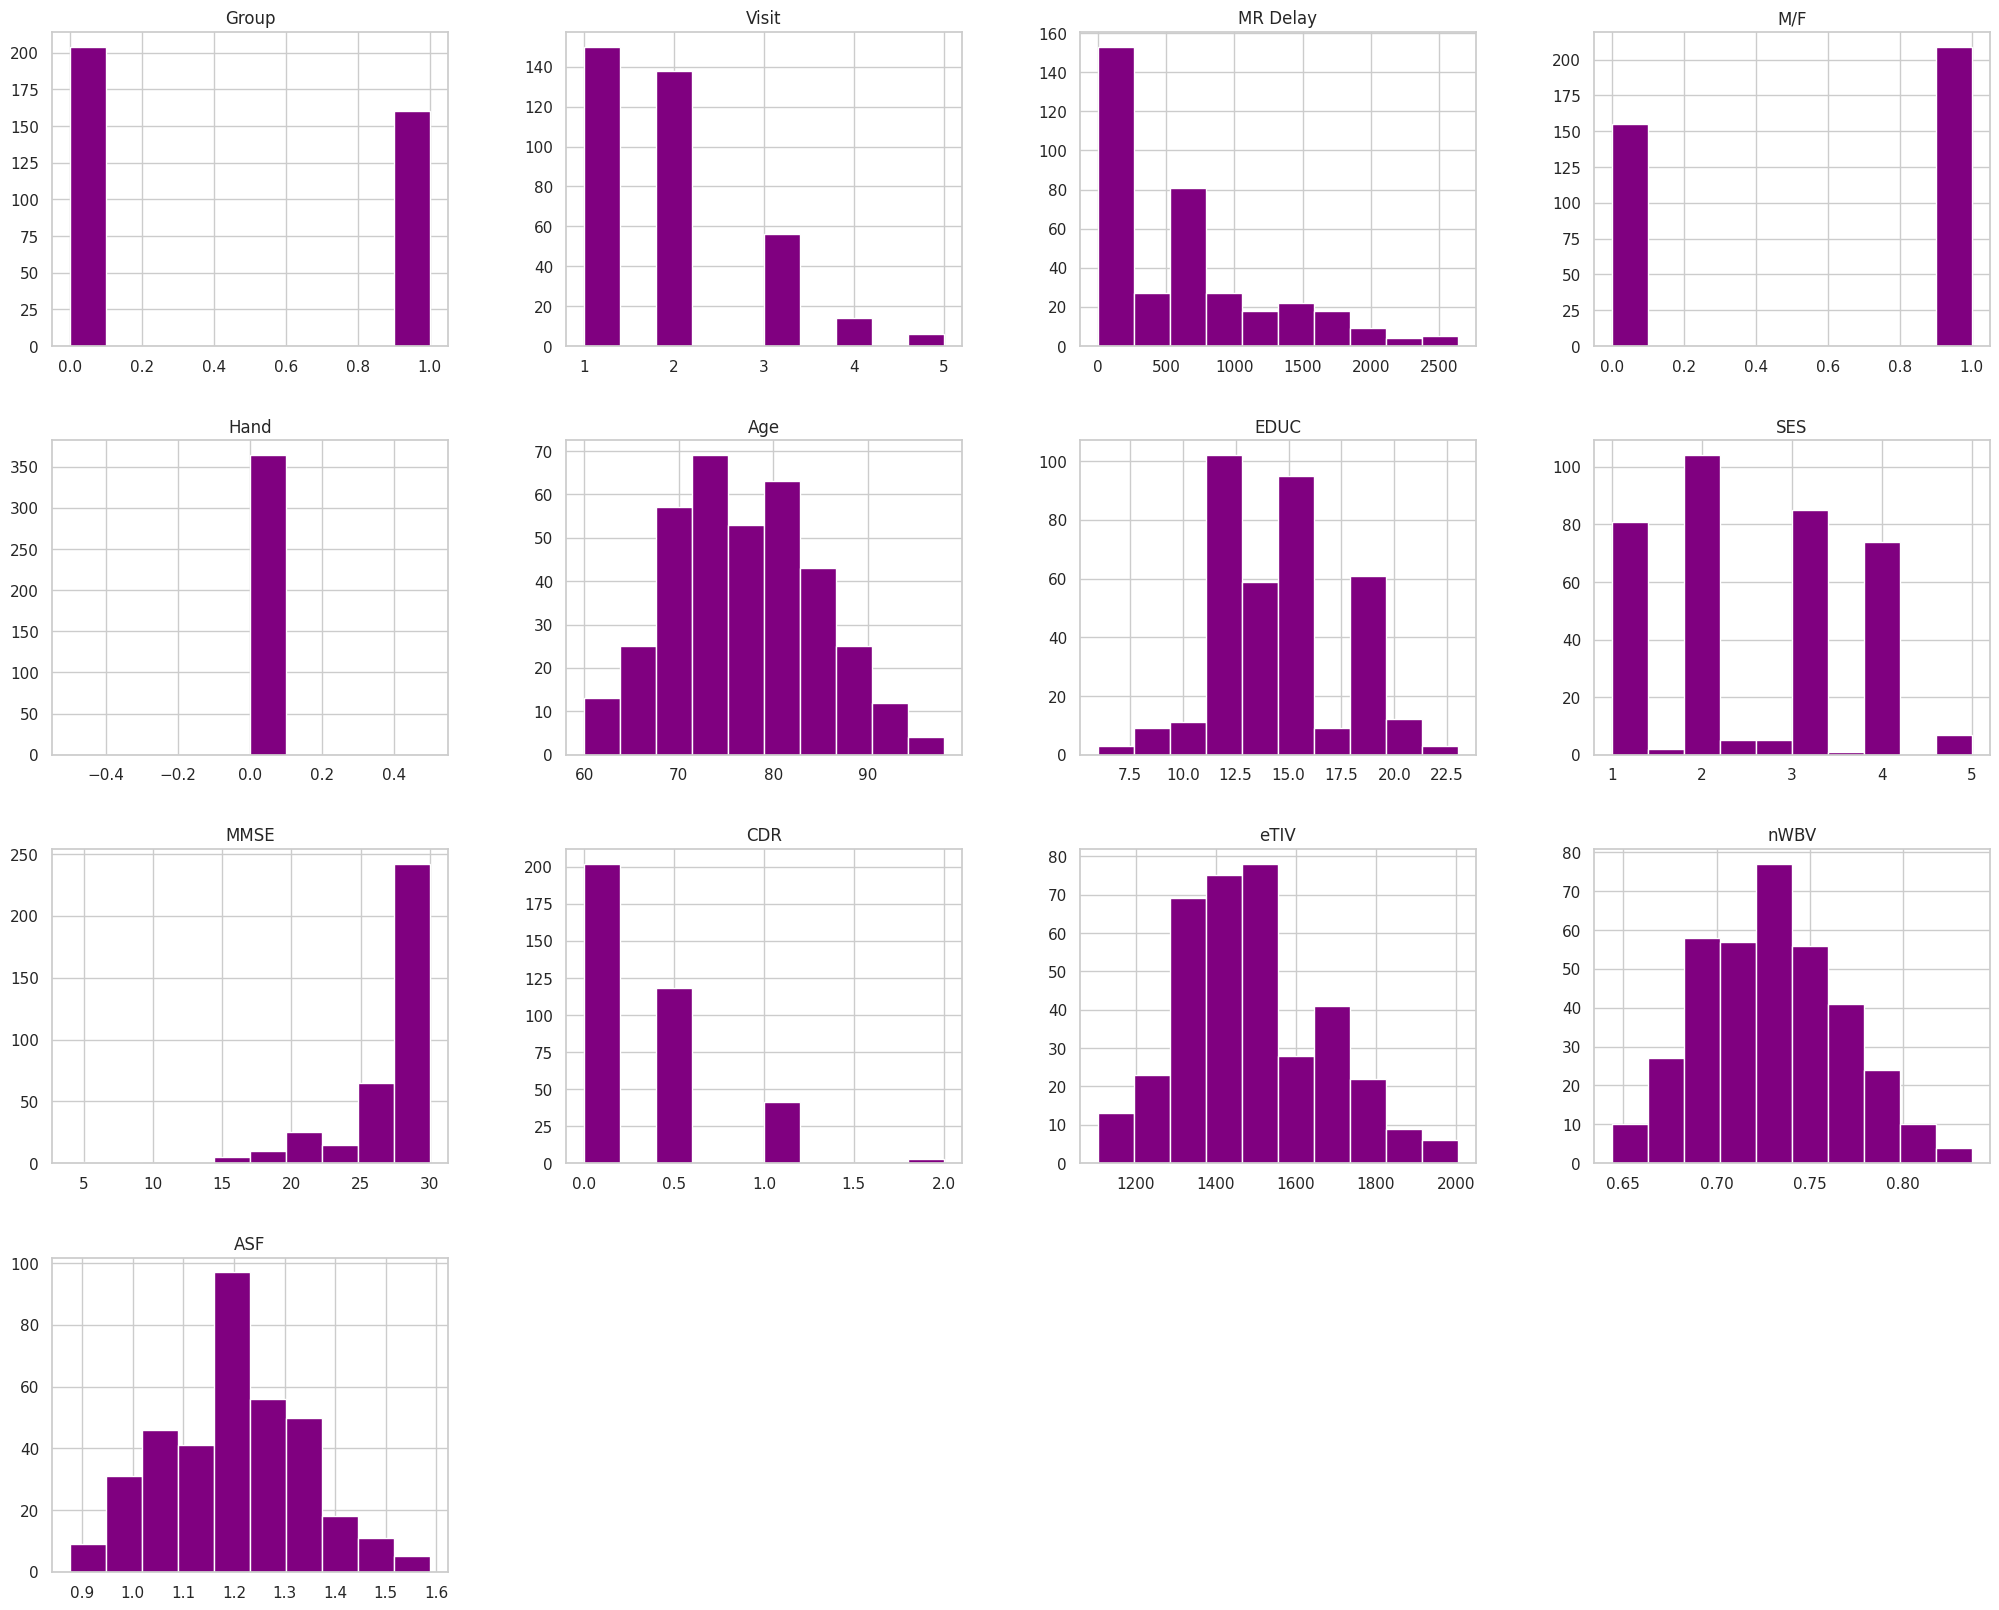

In [24]:
df.hist(figsize=(25,20));

### Correlations
---

For correlation, we will drop the hand column as the dataset only contains right-handed people.

In [25]:
correl = df.drop(columns='Hand').corr() 
correl['Group'].sort_values(ascending = False)

Group       1.000000
CDR         0.851030
SES         0.138507
ASF         0.018254
eTIV       -0.024467
Age        -0.024938
Visit      -0.041414
MR Delay   -0.068817
EDUC       -0.232042
M/F        -0.244793
nWBV       -0.325175
MMSE       -0.592315
Name: Group, dtype: float64

### Heatmap
---

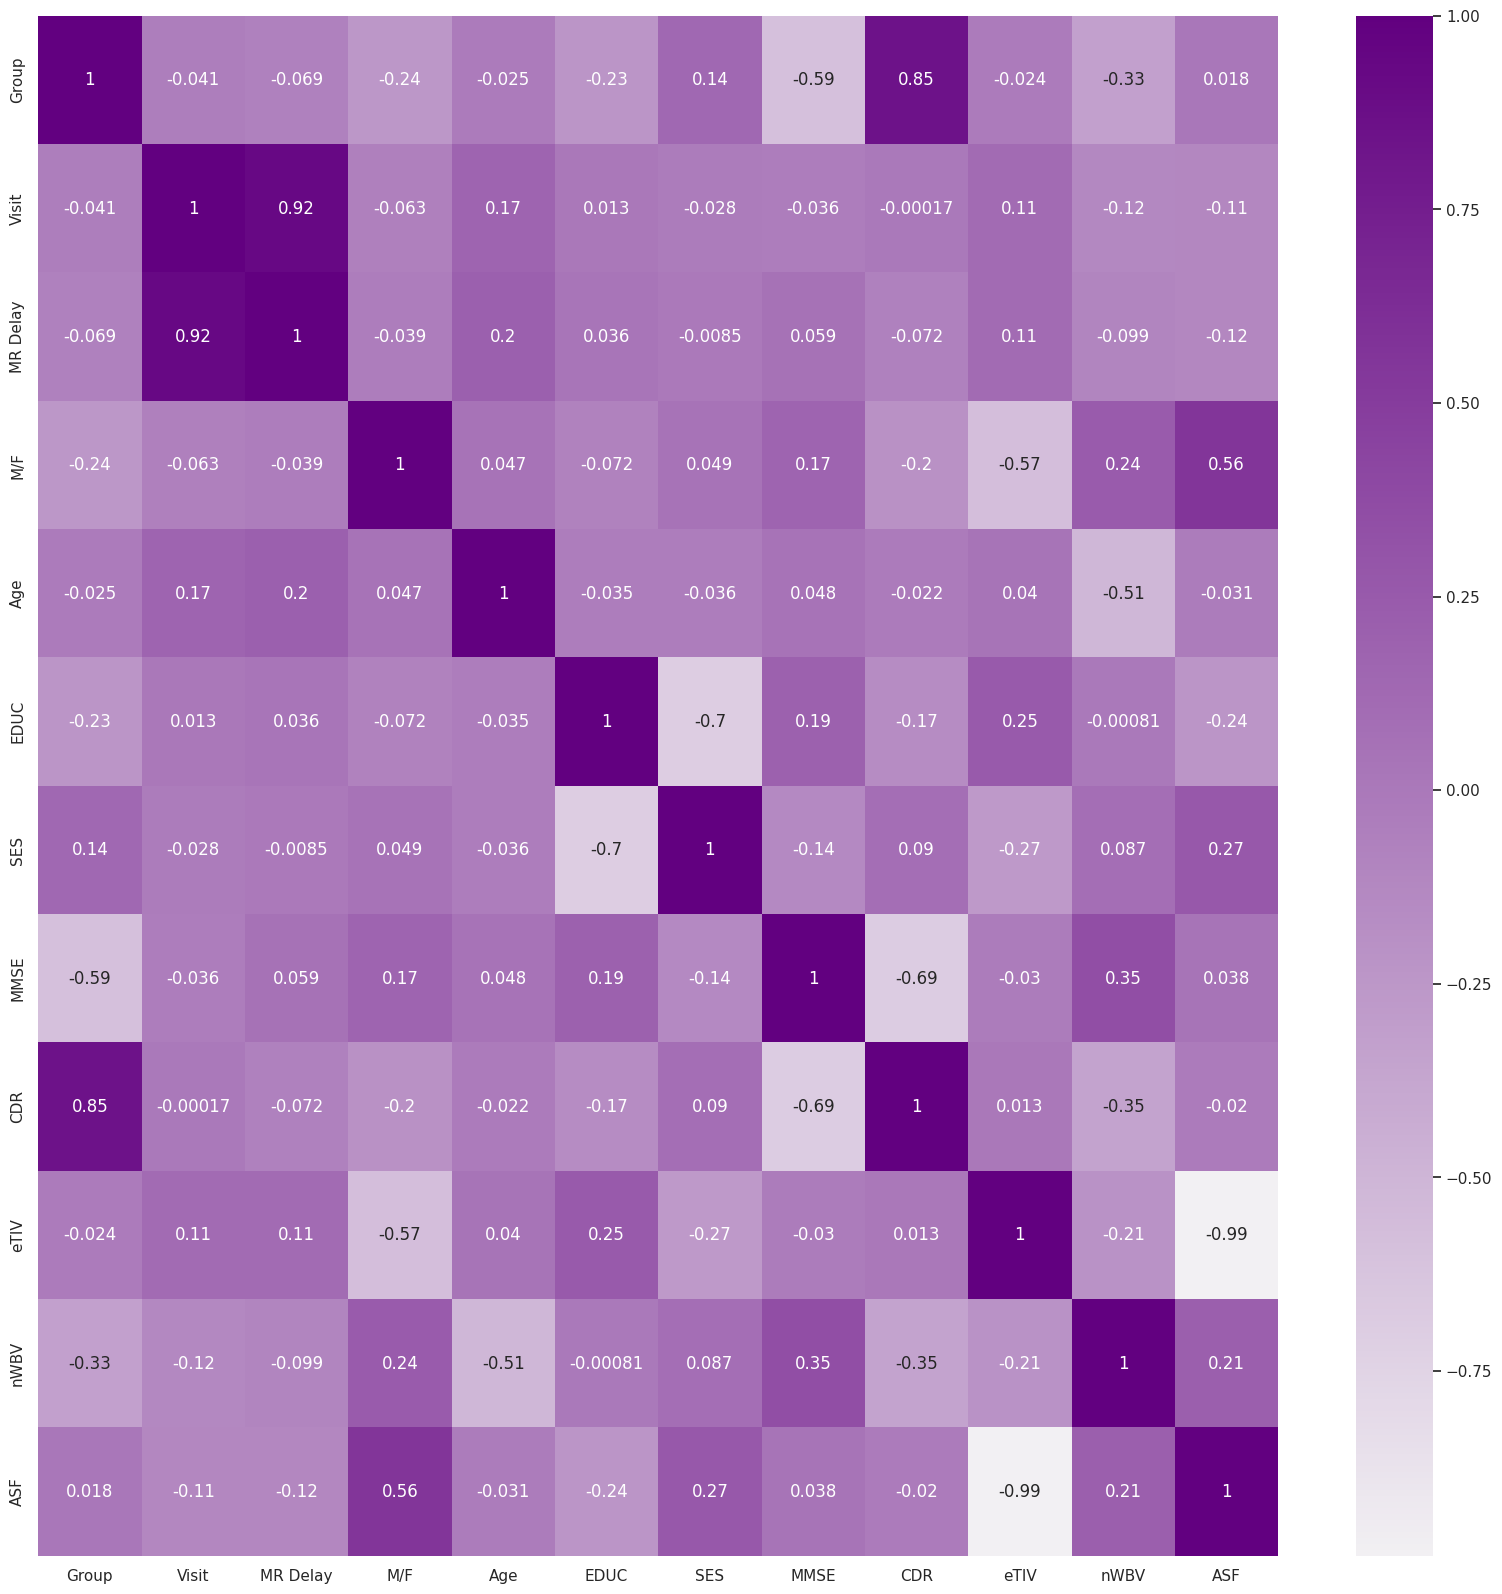

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(correl, annot=True, cmap=gradient_palette)
plt.show()

In [27]:
#sns.pairplot(df)

In [28]:
df.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.0,1.0,0.0,0.0,0.0,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883
1,0.0,2.0,457.0,0.0,0.0,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876
2,1.0,1.0,0.0,0.0,0.0,75.0,12.0,1.8,23.0,0.5,1678.0,0.736,1.046
3,1.0,2.0,560.0,0.0,0.0,76.0,12.0,1.6,28.0,0.5,1738.0,0.713,1.010
4,1.0,3.0,1895.0,0.0,0.0,80.0,12.0,2.6,22.0,0.5,1698.0,0.701,1.034


In [29]:
df.to_csv('data/dementia_data_processed.csv', index=False)

# Predicting Dementia
---

First we must import bnlearn and utils, which contains various pieces of code written by me to aid in this project.

In [30]:
import bnlearn as bn
from utils import *

## Discrete Bayesian Networks
---

### Discretising the Data
---

To prepare the data for a discrete BN, we must first discretise the data into bins.

In [31]:
discretised_df_3bins = discretise(df.copy(), nbins=3)
discretised_df_5bins = discretise(df.copy(), nbins=5)
discretised_df_sturges = discretise(df.copy())
discretised_df_freedman_diaconis = discretise(df.copy(), method='freedman-diaconis')

Then we can plot this discretised data to see the effects:

#### 3 Bin Discretisation
---

In [32]:
discretised_df_3bins.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,2,1,0,2,0,2,0,0
1,0,0,0,0,0,2,1,0,2,0,2,0,0
2,1,0,0,0,0,1,1,0,2,0,1,1,0
3,1,0,0,0,0,1,1,0,2,0,2,1,0
4,1,1,2,0,0,1,1,1,2,0,1,0,0


[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the

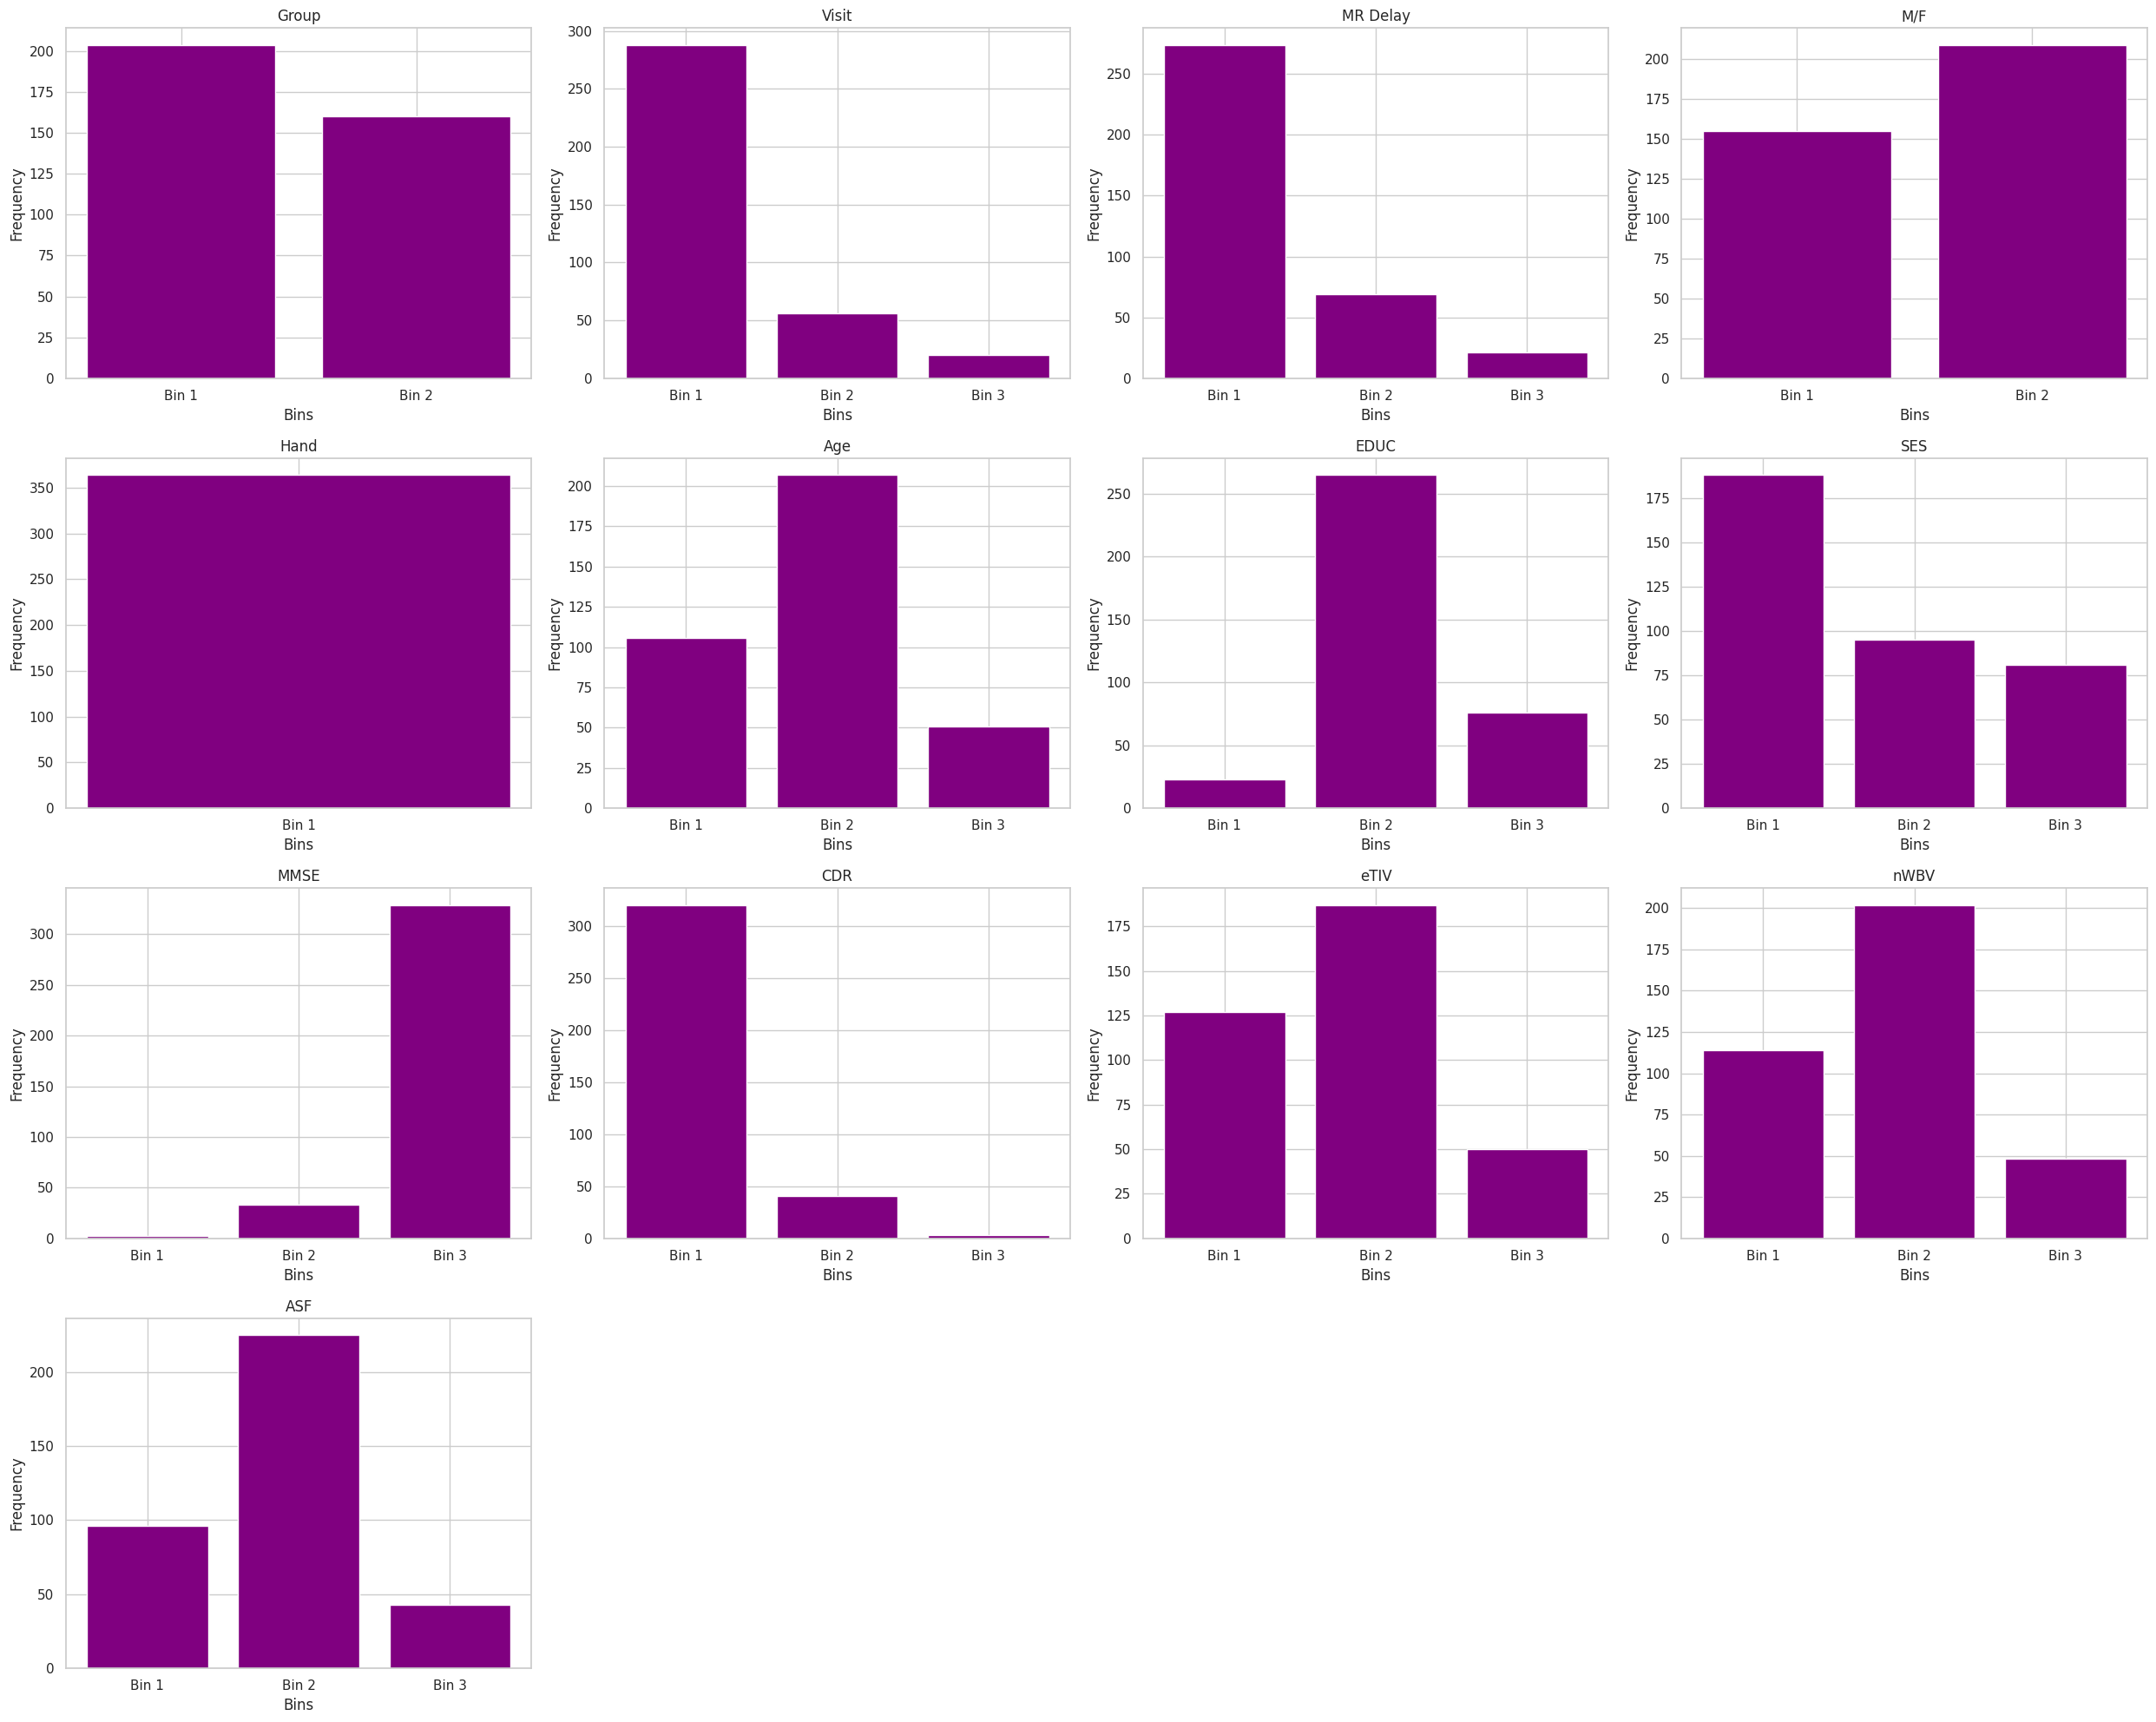

In [33]:
plot_bins_barcharts(discretised_df_3bins)
#discretised_df_3bins.hist(figsize=(20,25))

#### 5 Bin Discretisation
---

In [34]:
discretised_df_5bins.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,3,2,1,4,0,4,1,0
1,0,1,0,0,0,3,2,1,4,0,4,0,0
2,1,0,0,0,0,1,1,0,3,0,3,2,1
3,1,1,1,0,0,2,1,0,4,0,3,1,0
4,1,2,3,0,0,2,1,1,3,0,3,1,1


[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the

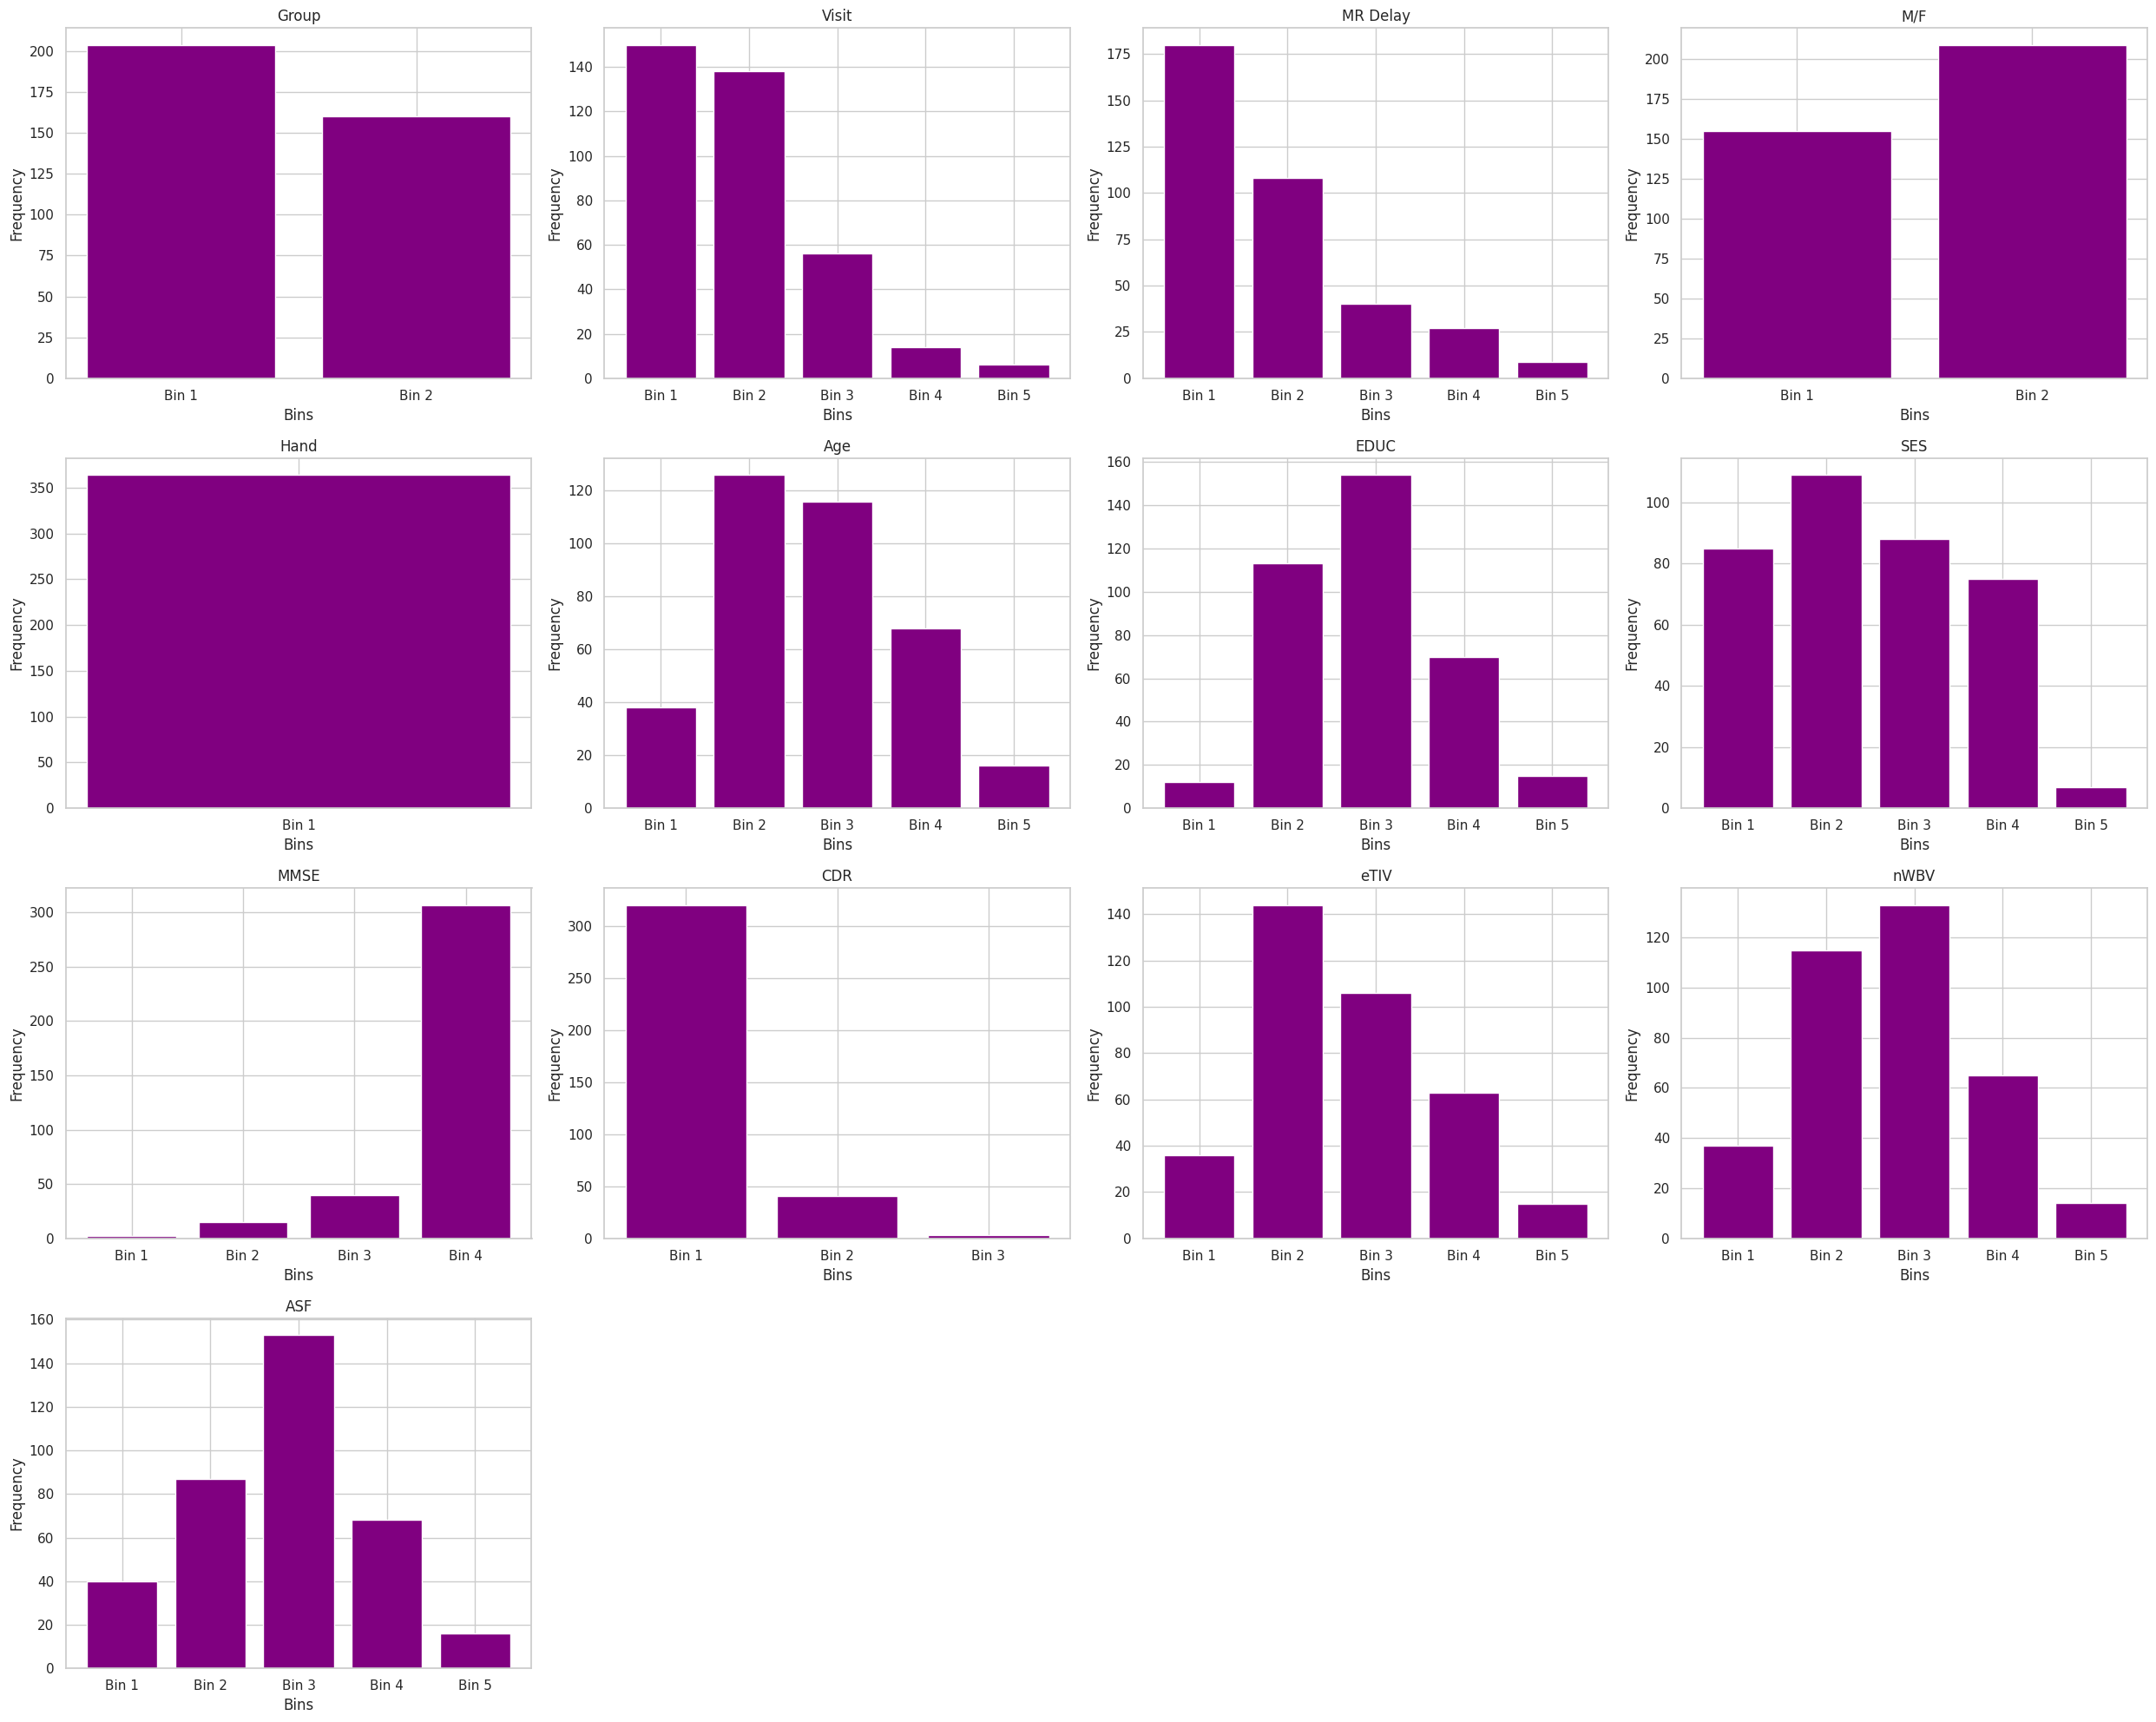

In [35]:
plot_bins_barcharts(discretised_df_5bins)

#### Sturges Formula Discretisation
---

In [36]:
discretised_df_sturges.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,7,4,2,8,0,9,2,0
1,0,1,1,0,0,7,4,2,9,0,9,1,0
2,1,0,0,0,0,3,3,1,7,0,6,4,2
3,1,1,2,0,0,4,3,1,9,0,7,3,1
4,1,2,7,0,0,5,3,3,6,0,6,2,2


[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the

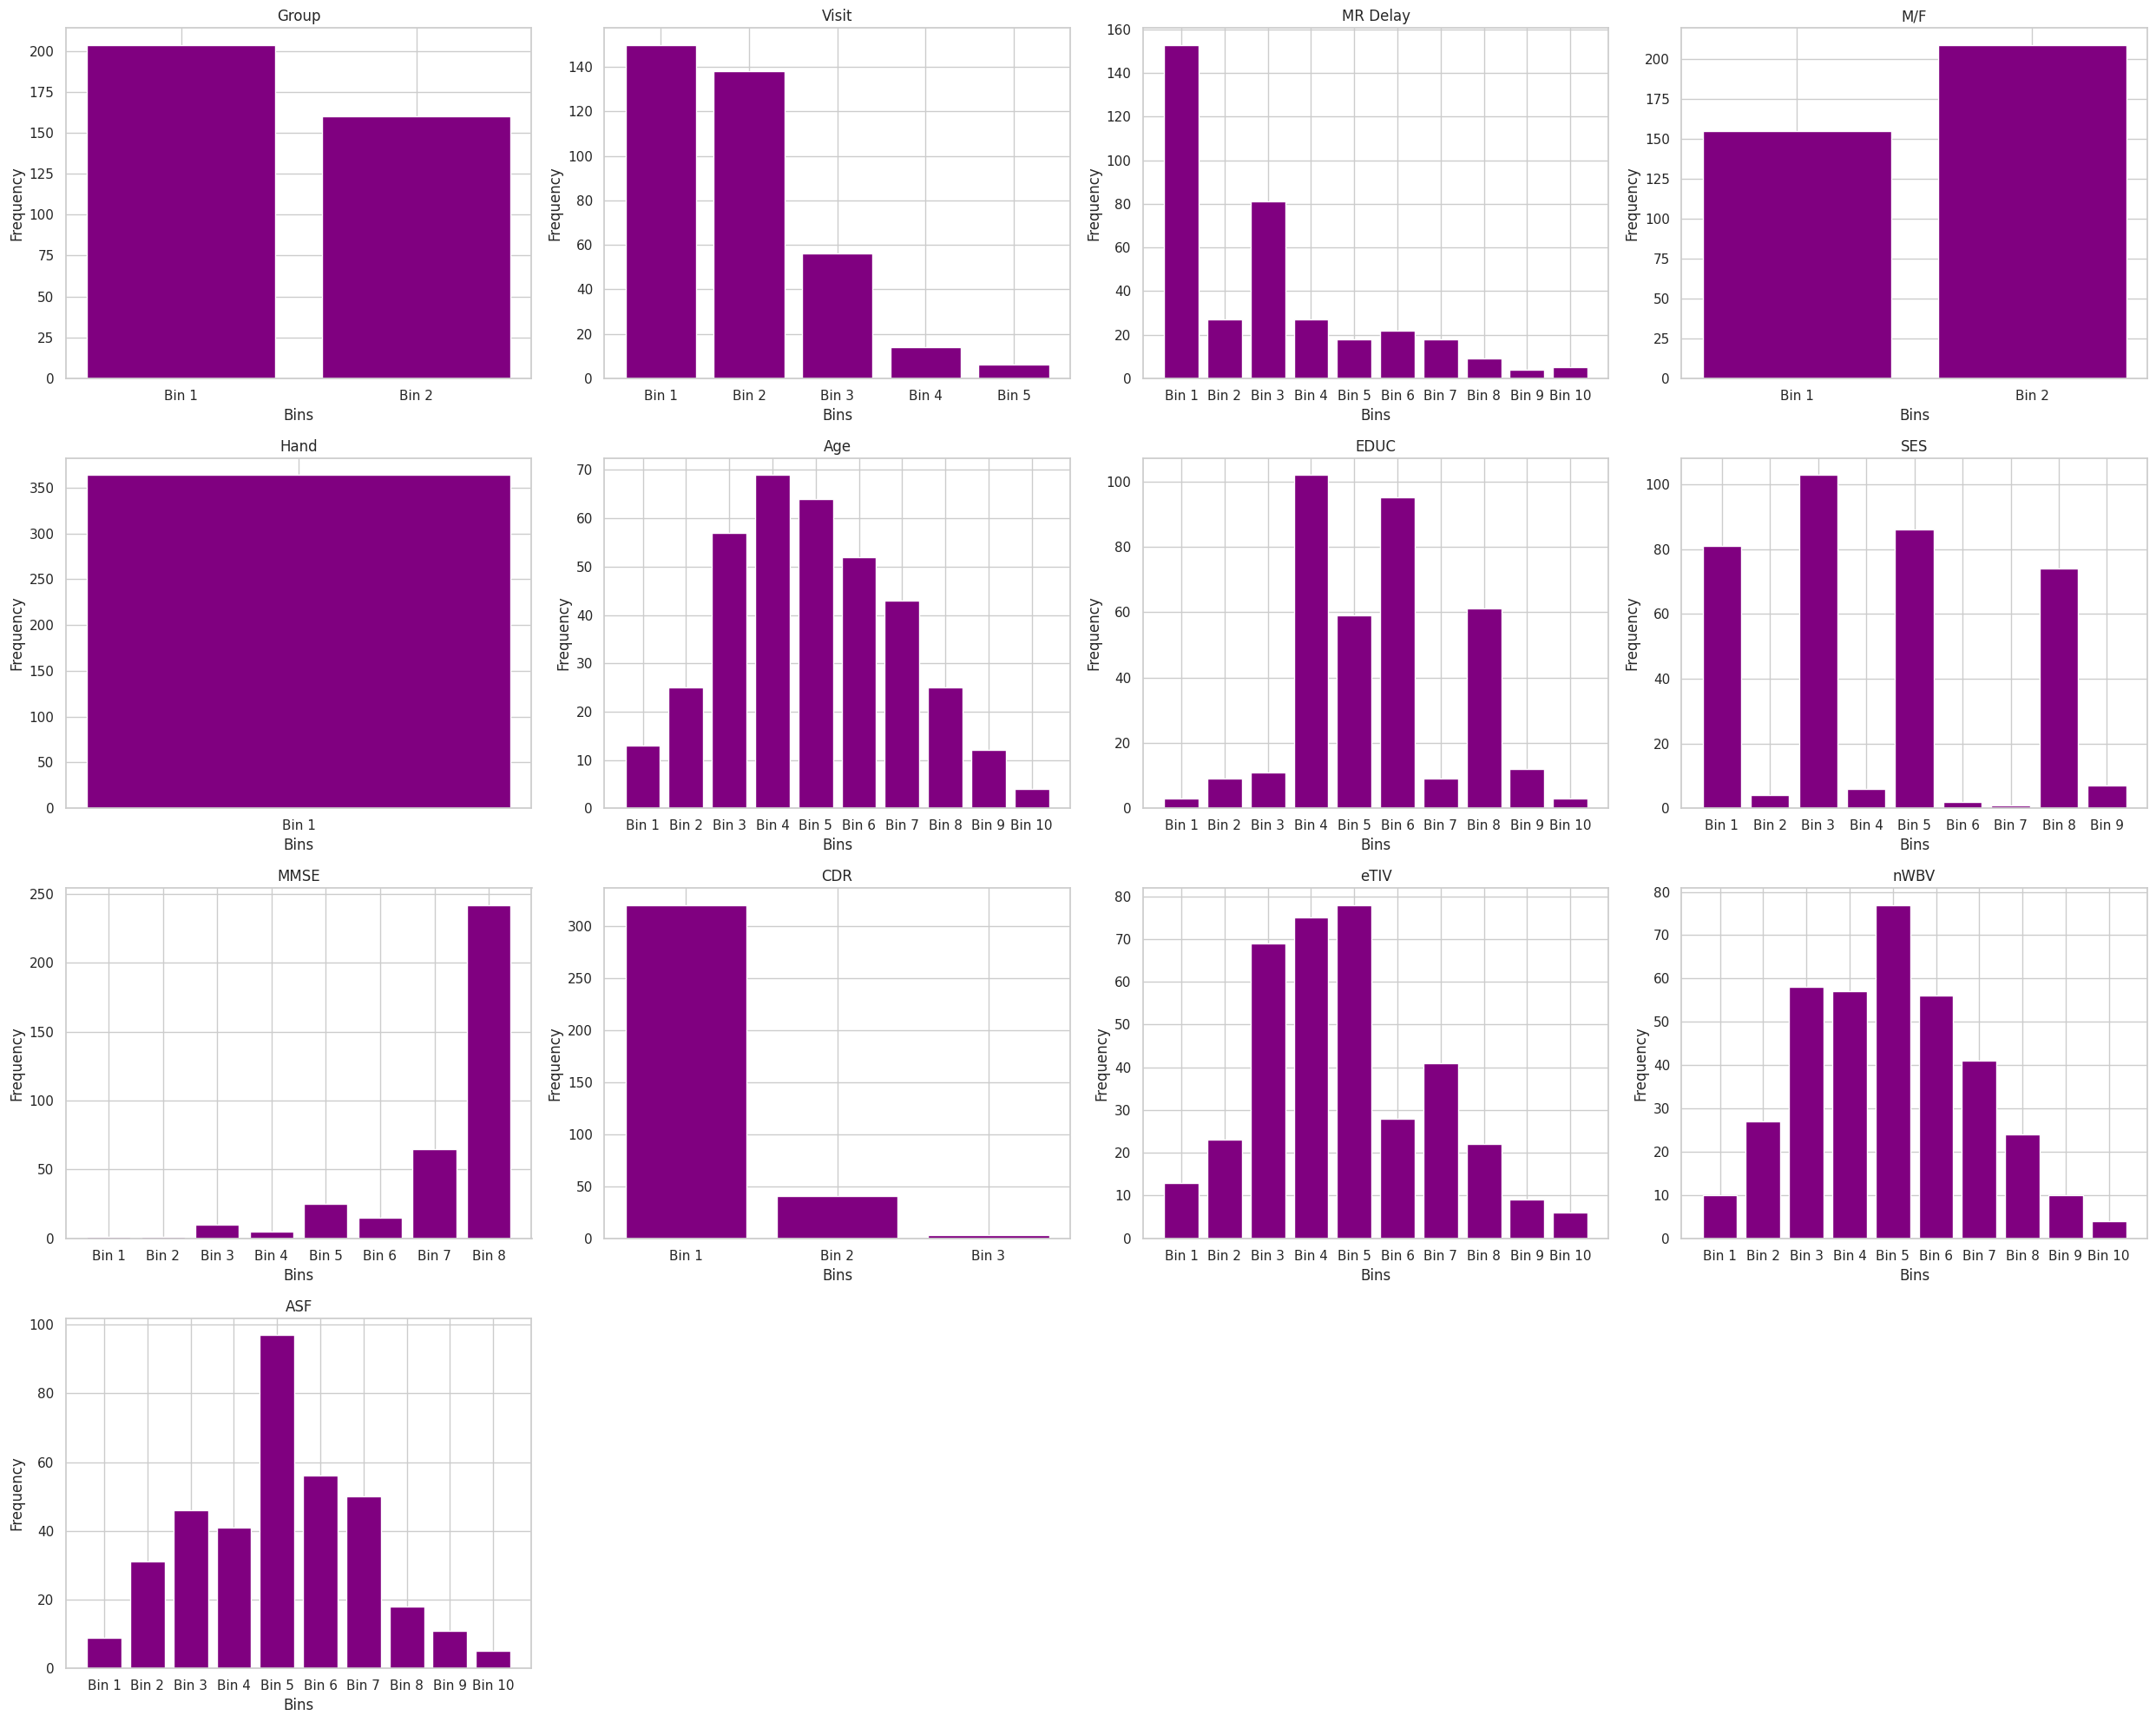

In [37]:
plot_bins_barcharts(discretised_df_sturges)

#### Freedman Diaconis Rule Discretisation
---

In [38]:
discretised_df_freedman_diaconis.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,9,5,3,16,0,13,3,0
1,0,1,1,0,0,9,5,3,18,0,13,2,0
2,1,0,0,0,0,5,4,2,13,0,8,6,3
3,1,1,2,0,0,5,4,1,17,0,9,4,2
4,1,2,7,0,0,6,4,5,13,0,9,3,3


[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[datazets] >INFO> Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the

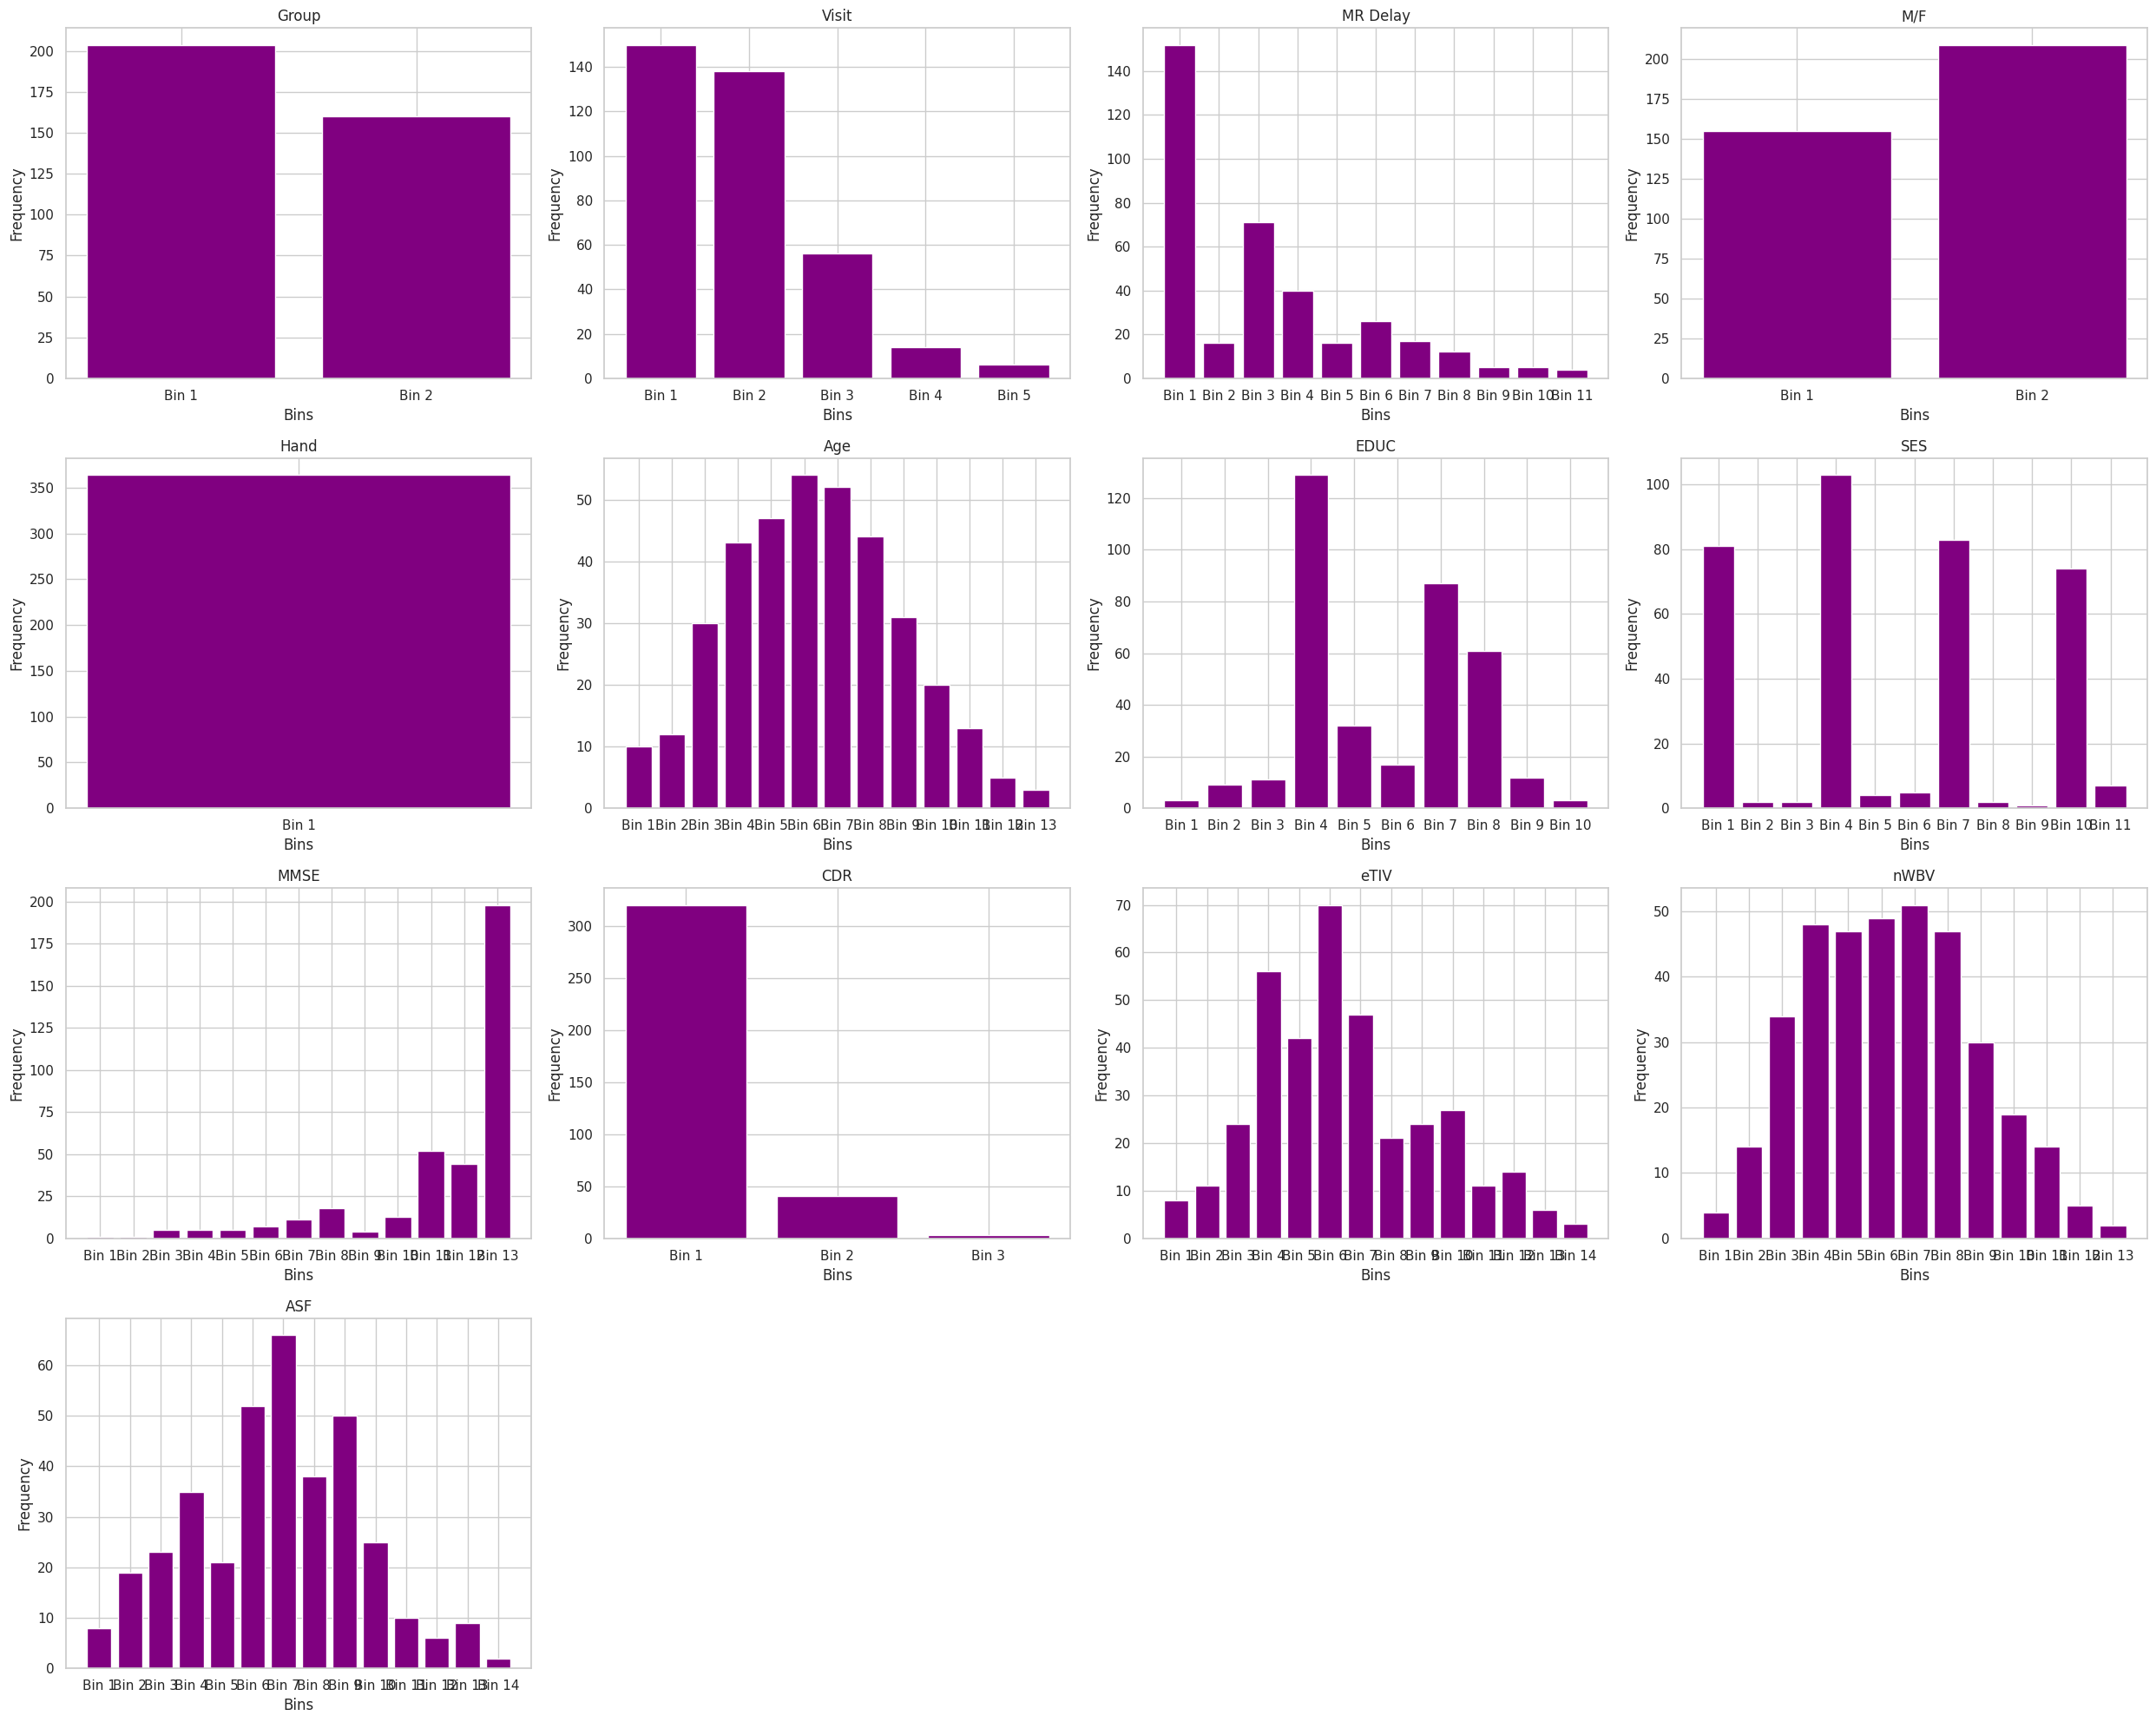

In [39]:
plot_bins_barcharts(discretised_df_freedman_diaconis)

### Comparing Discretisation Methods
---

To effectively compare the discrete data against the original continuous data, we will use Mean Squared Error (MSE).

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mse_3bins = mean_squared_error(df, discretised_df_3bins)
mse_5bins = mean_squared_error(df, discretised_df_5bins)
mse_sturges = mean_squared_error(df, discretised_df_sturges)
mse_freedman_diaconis = mean_squared_error(df, discretised_df_freedman_diaconis)

In [42]:
mse_values = [mse_3bins, mse_5bins, mse_sturges, mse_freedman_diaconis]

Now we can visualise the MSE scores of each method (the lower the better).

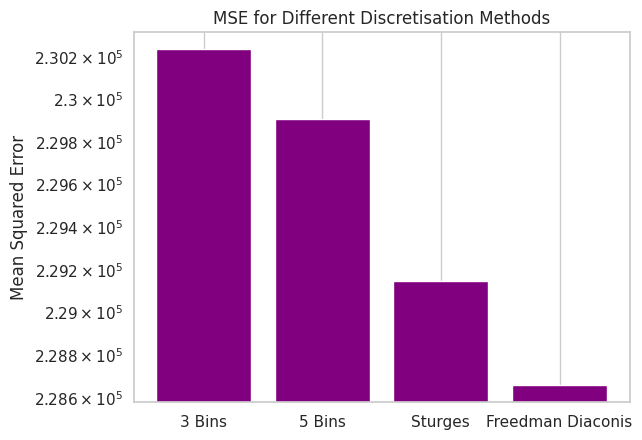

In [43]:
plt.bar(['3 Bins', '5 Bins', 'Sturges', 'Freedman Diaconis'], mse_values)
plt.title('MSE for Different Discretisation Methods')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.show()

As observed, the Freedman-Diaconis method yields the best performance among the four discretisation methods. However, the significantly high MSE score suggests that discretising the data may not be the most effective approach for this dataset. This indicates that using discrete Bayesian Networks (BNs) could be introducing substantial information loss, and further investigation into the use of continuous BNs may offer better performance, which we can explore in more detail later.

In [44]:
discrete_df = discretised_df_freedman_diaconis.copy()
discrete_df.describe()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,364.000000,364.000000,364.000000,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.439560,0.868132,2.151099,0.574176,0.0,5.296703,5.653846,4.467033,16.414835,0.137363,5.450549,5.285714,5.771978
std,0.497017,0.923627,2.465570,0.495148,0.0,2.559461,1.998887,3.325585,2.630799,0.410375,2.791225,2.506348,2.756447
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,4.000000,3.000000,16.000000,0.000000,3.000000,3.000000,4.000000
50%,0.000000,1.000000,2.000000,1.000000,0.0,5.000000,5.000000,3.000000,18.000000,0.000000,5.000000,5.000000,6.000000
75%,1.000000,1.000000,3.000000,1.000000,0.0,7.000000,7.000000,6.000000,18.000000,0.000000,7.000000,7.000000,8.000000
max,1.000000,4.000000,10.000000,1.000000,0.0,12.000000,11.000000,12.000000,18.000000,3.000000,13.000000,12.000000,13.000000


### Exploring Discrete Structure Learning Methods
---

Next, we will explore different structure learning methods for discrete Bayesian Networks using the discretised data. The results will be visualised to assess how well each method captures relationships within the data. They will then be evaluated using test data. This will help us to determine whether discrete BNs are appropriate for this dataset.

To do this, we must first split the discretised data into training and testing data:

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_df, test_df = train_test_split(discrete_df, test_size=0.2, random_state=42)

In [47]:
structures = {}

##### Hill Climbing (HC) Method
---

In [48]:
hc_bic_model = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='bic')
structures['Hill Climbing (BIC)'] = hc_bic_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [49]:
hc_aic_model = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='aic')
structures['Hill Climbing (AIC)'] = hc_aic_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [aic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [50]:
hc_k2_model = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='k2')
structures['Hill Climbing (K2)'] = hc_k2_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [51]:
hc_bds_model = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='bds')
structures['Hill Climbing (BDS)'] = hc_bds_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [52]:
hc_bdeu_model = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='bdeu')
structures['Hill Climbing (BDeu)'] = hc_bdeu_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).


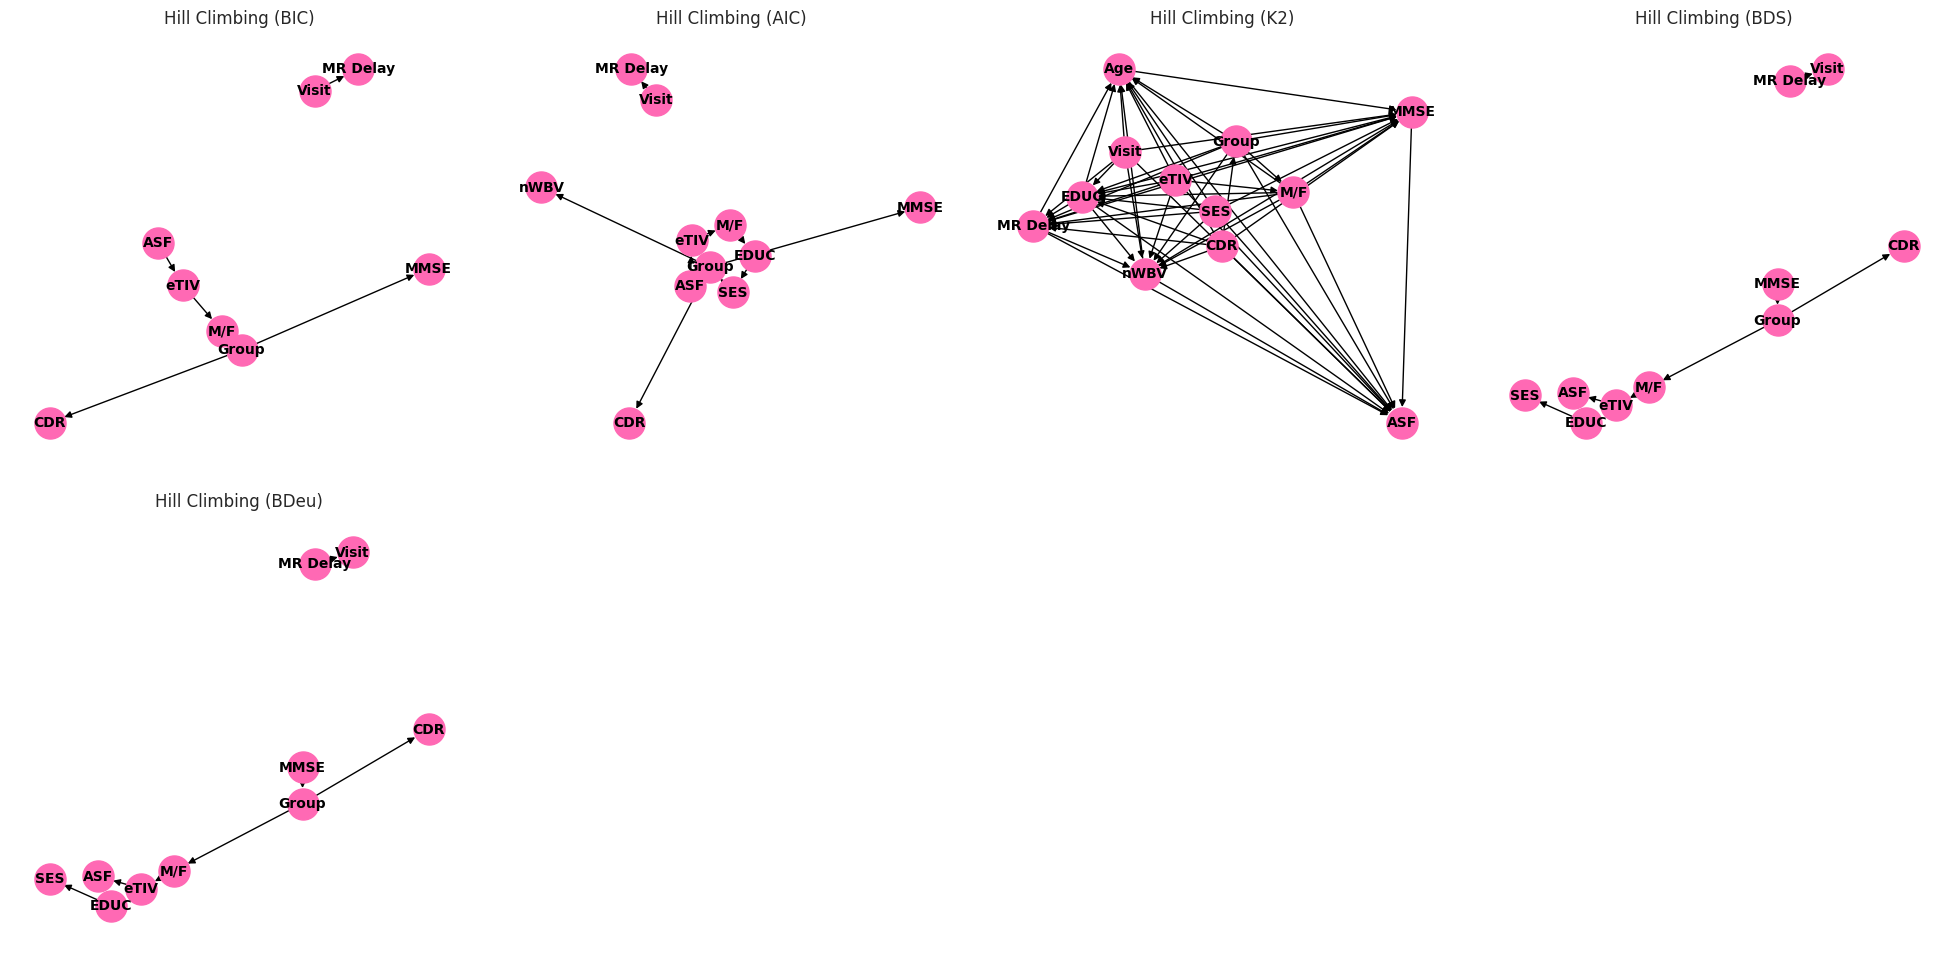

In [53]:
plot_bn_models({title: model for title, model in structures.items() if model['config']['method'] == 'hc'})

#### Naive Bayes
---

Score methods have no effect on the structure when using Naive Bayes, so we will just use the default. This method also needs a "root node", which in the case of Naive Bayes is the classification we are trying to predict.

In [54]:
nb_model = bn.structure_learning.fit(train_df, methodtype='nb', root_node='Group')
structures['Naive Bayes'] = nb_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).


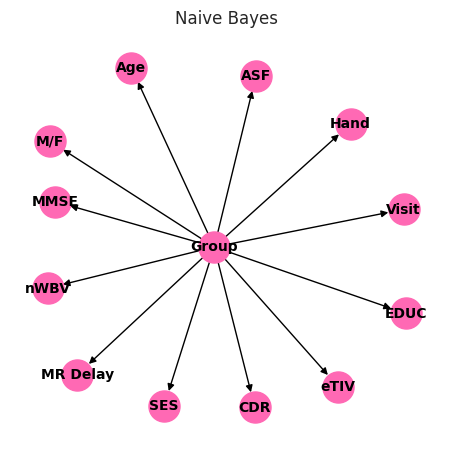

In [55]:
plot_bn_models({title: model for title, model in structures.items() if model['config']['method'] == 'nb'}, max_columns=1)

#### Tree-Augmented Naive Bayes
---

In [56]:
tan_model = bn.structure_learning.fit(train_df, methodtype='tan', class_node='Group')
structures['Tree-Augmented Naive Bayes'] = tan_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


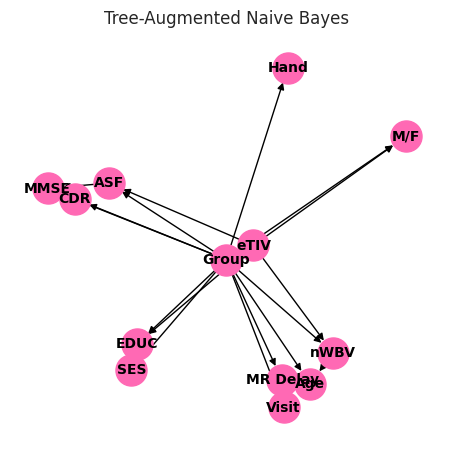

In [57]:
plot_bn_models({title: model for title, model in structures.items() if model['config']['method'] == 'tan'}, max_columns=1)

#### Chow-Liu Tree
---

In [58]:
chow_liu_model = bn.structure_learning.fit(train_df, methodtype='chow-liu')
structures['Chow-Liu Tree'] = chow_liu_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >WARNING> Skipping computing structure score for [k2].


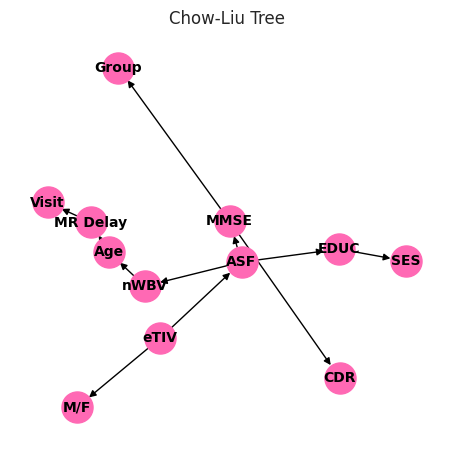

In [59]:
plot_bn_models({title: model for title, model in structures.items() if model['config']['method'] == 'chow-liu'}, max_columns=1)

#### PC Algorithm
---

In [60]:
pc_model = bn.structure_learning.fit(train_df, methodtype='pc', max_indegree=3)
structures['PC Algorithm'] = pc_model

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Warning: max_indegree only works in case of methodtype="hc"
[bnlearn] >Computing best DAG using [pc]
[bnlearn] >Build skeleton with [chi_square] and alpha=0.05


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


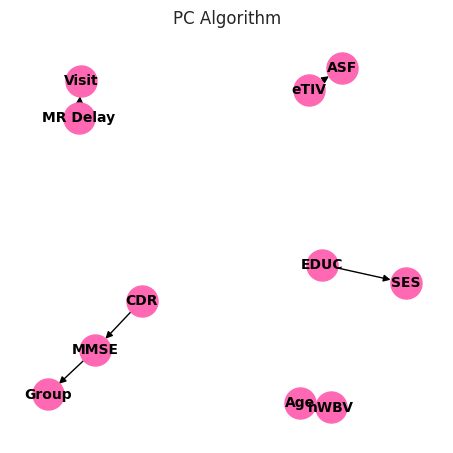

In [61]:
plot_bn_models({title: model for title, model in structures.items() if model['config']['method'] == 'pc'}, max_columns=1)

#### Hybrid Structure Learning: Min-Max Hill Climbing (MMHC)
---

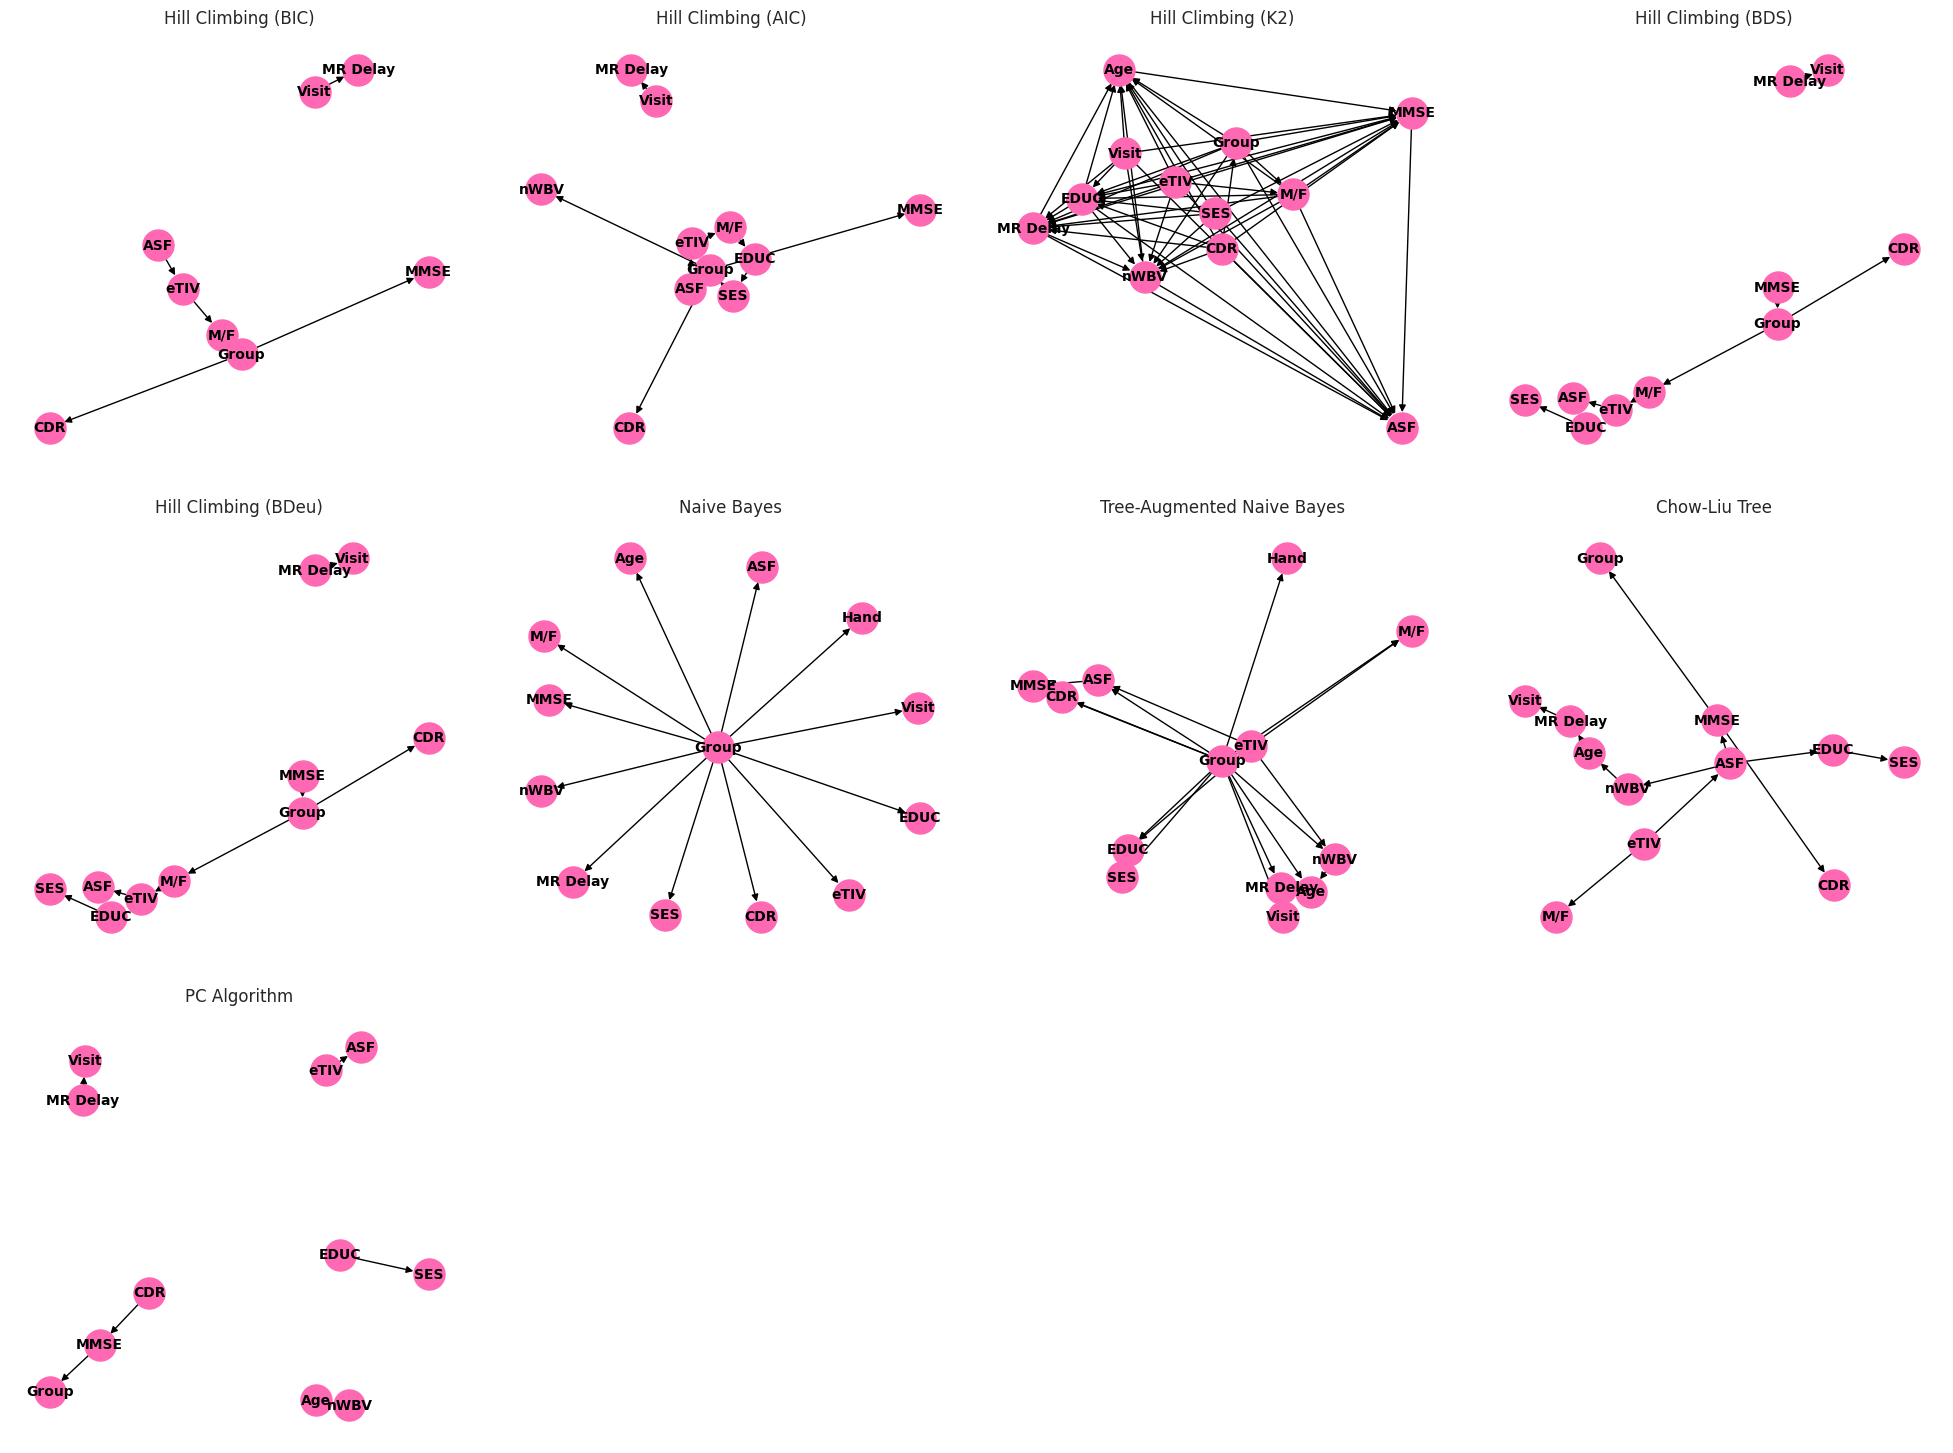

In [62]:
plot_bn_models(structures)
#print(structures)

### Parameter Learning
---

In [63]:
learned_models = {}

#### Hill Climbing (AIC)
---

In [64]:
hc_aic_bayes_model = bn.parameter_learning.fit(hc_aic_model, train_df, methodtype='bayes')
learned_models['Hill Climbing AIC (Bayes)'] = hc_aic_bayes_model

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Group:
+----------+-------------------+-----+--------------------+
| SES      | SES(0)            | ... | SES(12)            |
+----------+-------------------+-----+--------------------+
| Group(0) | 0.529238038984052 | ... | 0.4793621013133208 |
+----------+-------------------+-----+--------------------+
| Group(1) | 0.470761961015948 | ... | 0.5206378986866792 |
+----------+-------------------+-----+--------------------+
[bnlearn] >CPD of MMSE:
+----------+----------------------+---------------------+
| Group    | Group(0)             | Group(1)            |
+----------+----------------------+---------------------+
| MMSE(0)  | 0.058186896310950774 | 0.06263736263736264 |
+----------+----------------------+---------------------+
| MMSE(2)  | 0.058186896310950774 | 0.062637362

In [65]:
hc_aic_ml_model = bn.parameter_learning.fit(hc_aic_model, train_df, methodtype='ml')
learned_models['Hill Climbing AIC (Maximum-Likelihood)'] = hc_aic_ml_model

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Group:
+----------+---------------------+-----+---------------------+
| SES      | SES(0)              | ... | SES(12)             |
+----------+---------------------+-----+---------------------+
| Group(0) | 0.5714285714285714  | ... | 0.16666666666666666 |
+----------+---------------------+-----+---------------------+
| Group(1) | 0.42857142857142855 | ... | 0.8333333333333334  |
+----------+---------------------+-----+---------------------+
[bnlearn] >CPD of MMSE:
+----------+----------------------+----------------------+
| Group    | Group(0)             | Group(1)             |
+----------+----------------------+----------------------+
| MMSE(0)  | 0.0                  | 0.007692307692307693 |
+----------+----------------------+----------------------+
| MMSE(2)  | 0.0        

#### Tree-Augmented Naive Bayes
---

In [66]:
tan_bayes_model = bn.parameter_learning.fit(tan_model, train_df, methodtype='bayes')
learned_models['Tree-Augmented Naive Bayes (Bayes)'] = tan_bayes_model

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of eTIV:
+----------+---------------------+----------------------+
| Group    | Group(0)            | Group(1)             |
+----------+---------------------+----------------------+
| eTIV(0)  | 0.06008212664793604 | 0.06303854875283448  |
+----------+---------------------+----------------------+
| eTIV(1)  | 0.06159498595202076 | 0.058276643990929716 |
+----------+---------------------+----------------------+
| eTIV(2)  | 0.0721850010806138  | 0.072562358276644    |
+----------+---------------------+----------------------+
| eTIV(3)  | 0.09185217203371517 | 0.08367346938775512  |
+----------+---------------------+----------------------+
| eTIV(4)  | 0.08126215690512212 | 0.0852607709750567   |
+----------+---------------------+----------------------+
| eTIV(5)  | 0.0948778906418

In [67]:
tan_bayes_model = bn.parameter_learning.fit(tan_model, train_df, methodtype='ml')
learned_models['Tree-Augmented Naive Bayes (Maximum-Likelihood)'] = tan_bayes_model

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of eTIV:
+----------+----------------------+----------------------+
| Group    | Group(0)             | Group(1)             |
+----------+----------------------+----------------------+
| eTIV(0)  | 0.024844720496894408 | 0.03076923076923077  |
+----------+----------------------+----------------------+
| eTIV(1)  | 0.031055900621118012 | 0.007692307692307693 |
+----------+----------------------+----------------------+
| eTIV(2)  | 0.07453416149068323  | 0.07692307692307693  |
+----------+----------------------+----------------------+
| eTIV(3)  | 0.15527950310559005  | 0.13076923076923078  |
+----------+----------------------+----------------------+
| eTIV(4)  | 0.11180124223602485  | 0.13846153846153847  |
+----------+----------------------+----------------------+
| eTIV(5)  | 0.167

#### PC Algorithm
---

In [68]:
pc_bayes_model = bn.parameter_learning.fit(pc_model, train_df, methodtype='bayes')
learned_models['PC Algorithm (Bayes)'] = pc_bayes_model

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of CDR:
+--------+----------+
| CDR(0) | 0.45417  |
+--------+----------+
| CDR(1) | 0.285309 |
+--------+----------+
| CDR(3) | 0.260522 |
+--------+----------+
[bnlearn] >CPD of MMSE:
+----------+----------------------+---------------------+---------------------+
| CDR      | CDR(0)               | CDR(1)              | CDR(3)              |
+----------+----------------------+---------------------+---------------------+
| MMSE(0)  | 0.043731140945467276 | 0.07232857640097459 | 0.07623694442326752 |
+----------+----------------------+---------------------+---------------------+
| MMSE(2)  | 0.043731140945467276 | 0.07232857640097459 | 0.07623694442326752 |
+----------+----------------------+---------------------+---------------------+
| MMSE(8)  | 0.043731140945467276 | 0.0804733

In [69]:
pc_ml_model = bn.parameter_learning.fit(pc_model, train_df, methodtype='ml')
learned_models['PC Algorithm (Maximum-Likelihood)'] = pc_ml_model

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of CDR:
+--------+-----------+
| CDR(0) | 0.869416  |
+--------+-----------+
| CDR(1) | 0.120275  |
+--------+-----------+
| CDR(3) | 0.0103093 |
+--------+-----------+
[bnlearn] >CPD of MMSE:
+----------+----------------------+---------------------+--------------------+
| CDR      | CDR(0)               | CDR(1)              | CDR(3)             |
+----------+----------------------+---------------------+--------------------+
| MMSE(0)  | 0.0                  | 0.02857142857142857 | 0.0                |
+----------+----------------------+---------------------+--------------------+
| MMSE(2)  | 0.0                  | 0.02857142857142857 | 0.0                |
+----------+----------------------+---------------------+--------------------+
| MMSE(8)  | 0.0                  | 0.1142857142

#### Chow-Liu Tree
---

In [70]:
chow_liu_bayes_model = bn.parameter_learning.fit(chow_liu_model, train_df, methodtype='bayes')
learned_models['Chow Liu Tree (Bayes)'] = chow_liu_bayes_model

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['Hand']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of eTIV:
+----------+-----------+
| eTIV(0)  | 0.0615248 |
+----------+-----------+
| eTIV(1)  | 0.0599757 |
+----------+-----------+
| eTIV(2)  | 0.0723691 |
+----------+-----------+
| eTIV(3)  | 0.087861  |
+----------+-----------+
| eTIV(4)  | 0.0832135 |
+----------+-----------+
| eTIV(5)  | 0.0971561 |
+----------+-----------+
| eTIV(6)  | 0.0863118 |
+----------+-----------+
| eTIV(7)  | 0.0692708 |
+----------+-----------+
| eTIV(8)  | 0.07082   |
+----------+-----------+
| eTIV(9)  | 0.0700454 |
+----------+-----------+
| eTIV(10) | 0.0615248 |
+----------+-----------+
| eTIV(11) | 0.063074  |
+----------+-----------+
| eTIV(12) | 0.0599757 |
+----------+-----------+
| eTIV(13) | 0.0568773 |


In [71]:
chow_liu_ml_model = bn.parameter_learning.fit(chow_liu_model, train_df, methodtype='ml')
learned_models['Chow Liu Tree Algorithm (Maximum-Likelihood)'] = chow_liu_ml_model

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of eTIV:
+----------+------------+
| eTIV(0)  | 0.0274914  |
+----------+------------+
| eTIV(1)  | 0.0206186  |
+----------+------------+
| eTIV(2)  | 0.0756014  |
+----------+------------+
| eTIV(3)  | 0.14433    |
+----------+------------+
| eTIV(4)  | 0.123711   |
+----------+------------+
| eTIV(5)  | 0.185567   |
+----------+------------+
| eTIV(6)  | 0.137457   |
+----------+------------+
| eTIV(7)  | 0.0618557  |
+----------+------------+
| eTIV(8)  | 0.0687285  |
+----------+------------+
| eTIV(9)  | 0.0652921  |
+----------+------------+
| eTIV(10) | 0.0274914  |
+----------+------------+
| eTIV(11) | 0.0343643  |
+----------+------------+
| eTIV(12) | 0.0206186  |
+----------+------------+
| eTIV(13) | 0.00687285 |
+----------+------------+
[bnlearn] >CPD of ASF:
+-------

### Predictions Evaluation
---

In [72]:
predictions = {}

In [73]:
for title, model in learned_models.items():
    bayes_network = model['model']
    model_nodes = bayes_network.nodes()
    test_columns = test_df.columns.tolist()
    columns_to_drop = [col for col in test_columns if col not in model_nodes]
    test_df_filtered = test_df.drop(columns=columns_to_drop)
    
    pred = bn.predict(model, test_df_filtered, 'Group')
    pred = np.argmax(pred, axis=1)
    predictions[title] = pred

[bnlearn]> Remaining columns for inference: 10


100%|██████████| 73/73 [00:00<00:00, 1013.33it/s]


[bnlearn]> Remaining columns for inference: 10


100%|██████████| 73/73 [00:00<00:00, 921.23it/s]


[bnlearn]> Remaining columns for inference: 12


100%|██████████| 73/73 [00:00<00:00, 806.01it/s]


[bnlearn]> Remaining columns for inference: 12


100%|██████████| 73/73 [00:00<00:00, 807.65it/s]


[bnlearn]> Remaining columns for inference: 10


100%|██████████| 73/73 [00:00<00:00, 1103.27it/s]


[bnlearn]> Remaining columns for inference: 10


100%|██████████| 73/73 [00:00<00:00, 992.11it/s]


[bnlearn]> Remaining columns for inference: 11


100%|██████████| 73/73 [00:00<00:00, 959.50it/s]


[bnlearn]> Remaining columns for inference: 11


100%|██████████| 73/73 [00:00<00:00, 878.11it/s]


In [74]:
from sklearn.metrics import accuracy_score, classification_report

In [75]:
for title, pred in predictions.items():
    accuracy = accuracy_score(test_df['Group'], pred)
    print(f'{title} Accuracy: {(accuracy * 100):.3g}%')

Hill Climbing AIC (Bayes) Accuracy: 17.8%
Hill Climbing AIC (Maximum-Likelihood) Accuracy: 19.2%
Tree-Augmented Naive Bayes (Bayes) Accuracy: 13.7%
Tree-Augmented Naive Bayes (Maximum-Likelihood) Accuracy: 35.6%
PC Algorithm (Bayes) Accuracy: 16.4%
PC Algorithm (Maximum-Likelihood) Accuracy: 16.4%
Chow Liu Tree (Bayes) Accuracy: 16.4%
Chow Liu Tree Algorithm (Maximum-Likelihood) Accuracy: 16.4%


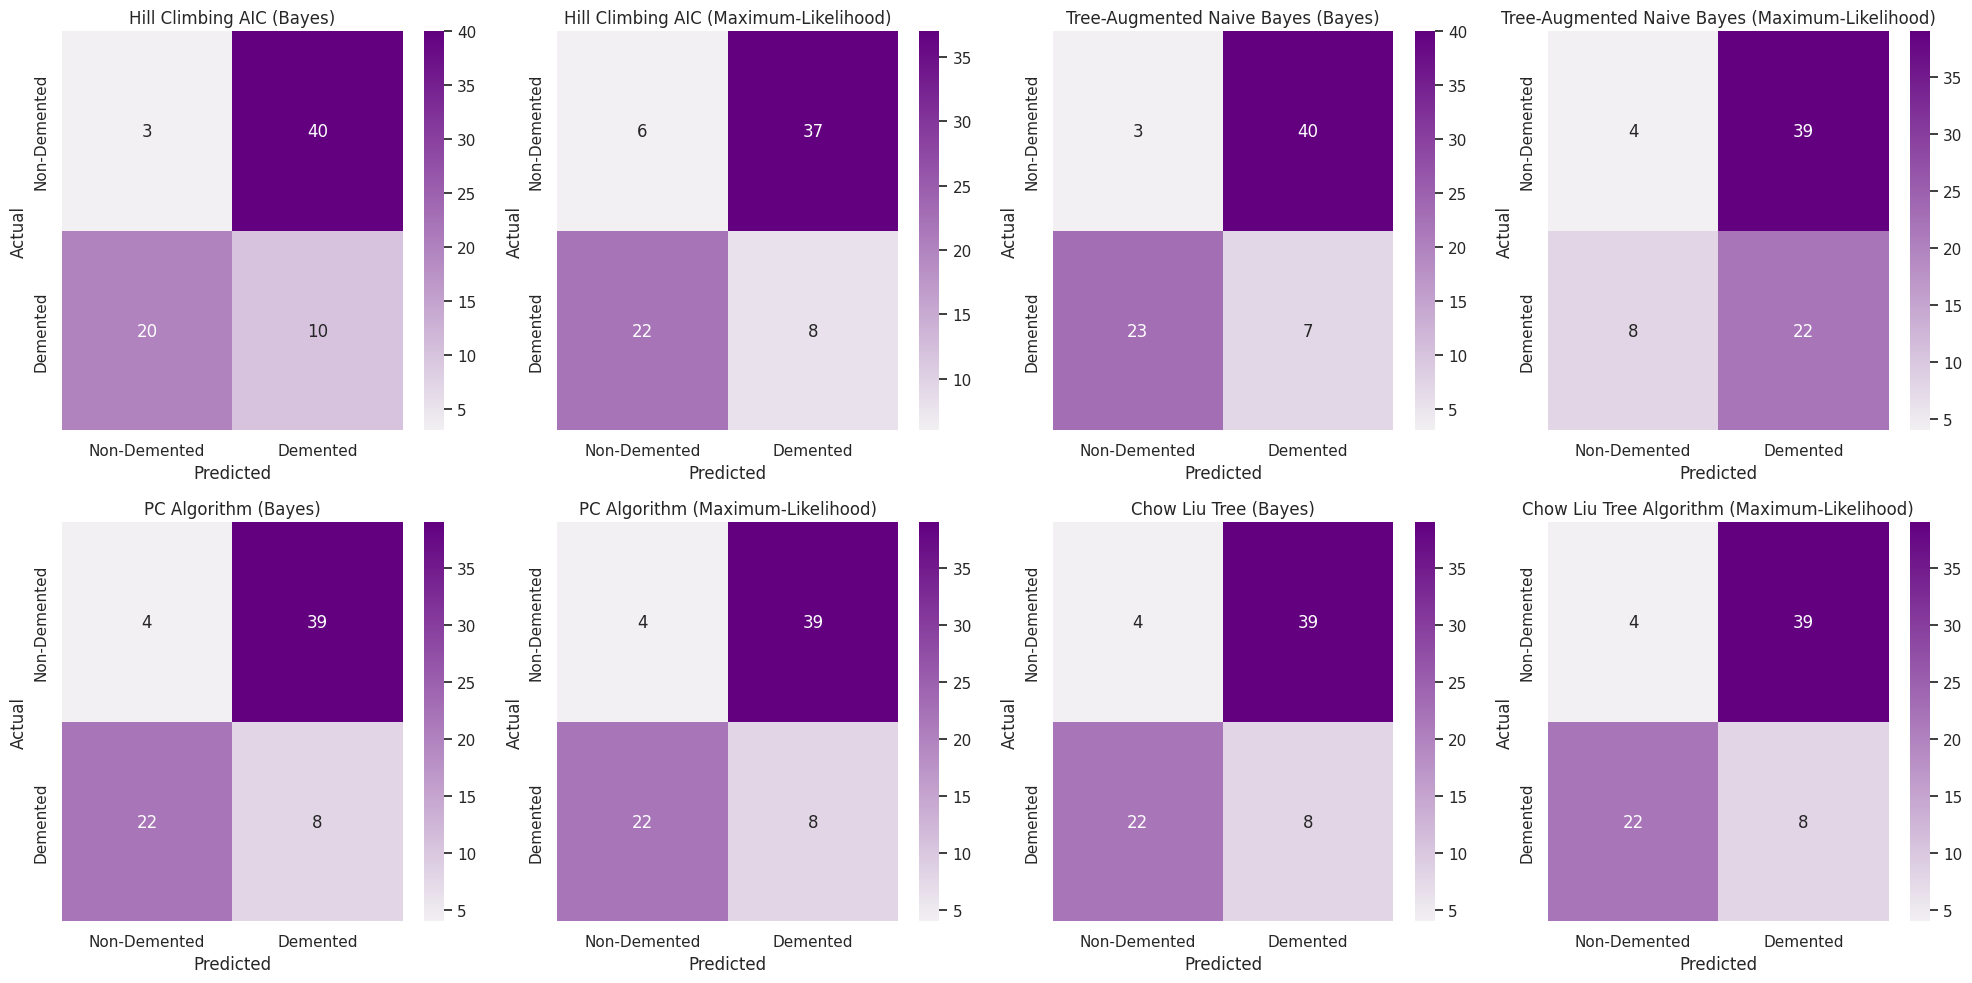

In [76]:
plot_confusion_matrices(predictions, test_df['Group'], cmap=gradient_palette)

In [77]:
for title, pred in predictions.items():
    print(f'{title} Classification Report:')
    print()
    print(classification_report(test_df['Group'], pred))

Hill Climbing AIC (Bayes) Classification Report:

              precision    recall  f1-score   support

           0       0.13      0.07      0.09        43
           1       0.20      0.33      0.25        30

    accuracy                           0.18        73
   macro avg       0.17      0.20      0.17        73
weighted avg       0.16      0.18      0.16        73

Hill Climbing AIC (Maximum-Likelihood) Classification Report:

              precision    recall  f1-score   support

           0       0.21      0.14      0.17        43
           1       0.18      0.27      0.21        30

    accuracy                           0.19        73
   macro avg       0.20      0.20      0.19        73
weighted avg       0.20      0.19      0.19        73

Tree-Augmented Naive Bayes (Bayes) Classification Report:

              precision    recall  f1-score   support

           0       0.12      0.07      0.09        43
           1       0.15      0.23      0.18        30

    accura

As predicted, the discrete Bayesian Networks do not perform well on this dataset. The overall low accuracy, precision, recall, and F1-scores across all models suggest that the models are not capturing the nuances of the data&mdash;even with the best-performing methods. Given these results, we hypothesise that Gaussian BNs (which can handle continuous data more effectively) may offer a better alternative and warrant further exploration. These models could potentially provide more accurate predictions, especially if the data contains continuous features that are better represented by Gaussian distributions rather than discrete categories.

## Continuous Bayesian Networks
---

### Train/Test Split
---

In [78]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

### Structure Learning
---

In [79]:
from pgmpy.estimators import HillClimbSearch, PC, BicScore, AICScore, K2Score, BDsScore, BDeuScore

In [80]:
structures = {}

#### Hill Climbing
---

In [81]:
hc = HillClimbSearch(data=train_df)

In [82]:
bic_score = BicScore(data=train_df)
hc_bic_model = hc.estimate(scoring_method=bic_score)
structures['Hill Climbing (BIC)'] = hc_bic_model

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [83]:
aic_score = AICScore(data=train_df)
hc_aic_model = hc.estimate(scoring_method=aic_score)
structures['Hill Climbing (AIC)'] = hc_aic_model

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [84]:
k2_score = K2Score(data=train_df)
hc_k2_model = hc.estimate(scoring_method=k2_score)
structures['Hill Climbing (K2)'] = hc_k2_model

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [85]:
bds_score = BDsScore(data=train_df)
hc_bds_model = hc.estimate(scoring_method=bds_score)
structures['Hill Climbing (BDs)'] = hc_bds_model

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [86]:
bdeu_score = BDeuScore(data=train_df)
hc_bdeu_model = hc.estimate(scoring_method=bdeu_score)
structures['Hill Climbing (BDeu)'] = hc_bdeu_model


  0%|          | 0/1000000 [00:00<?, ?it/s]

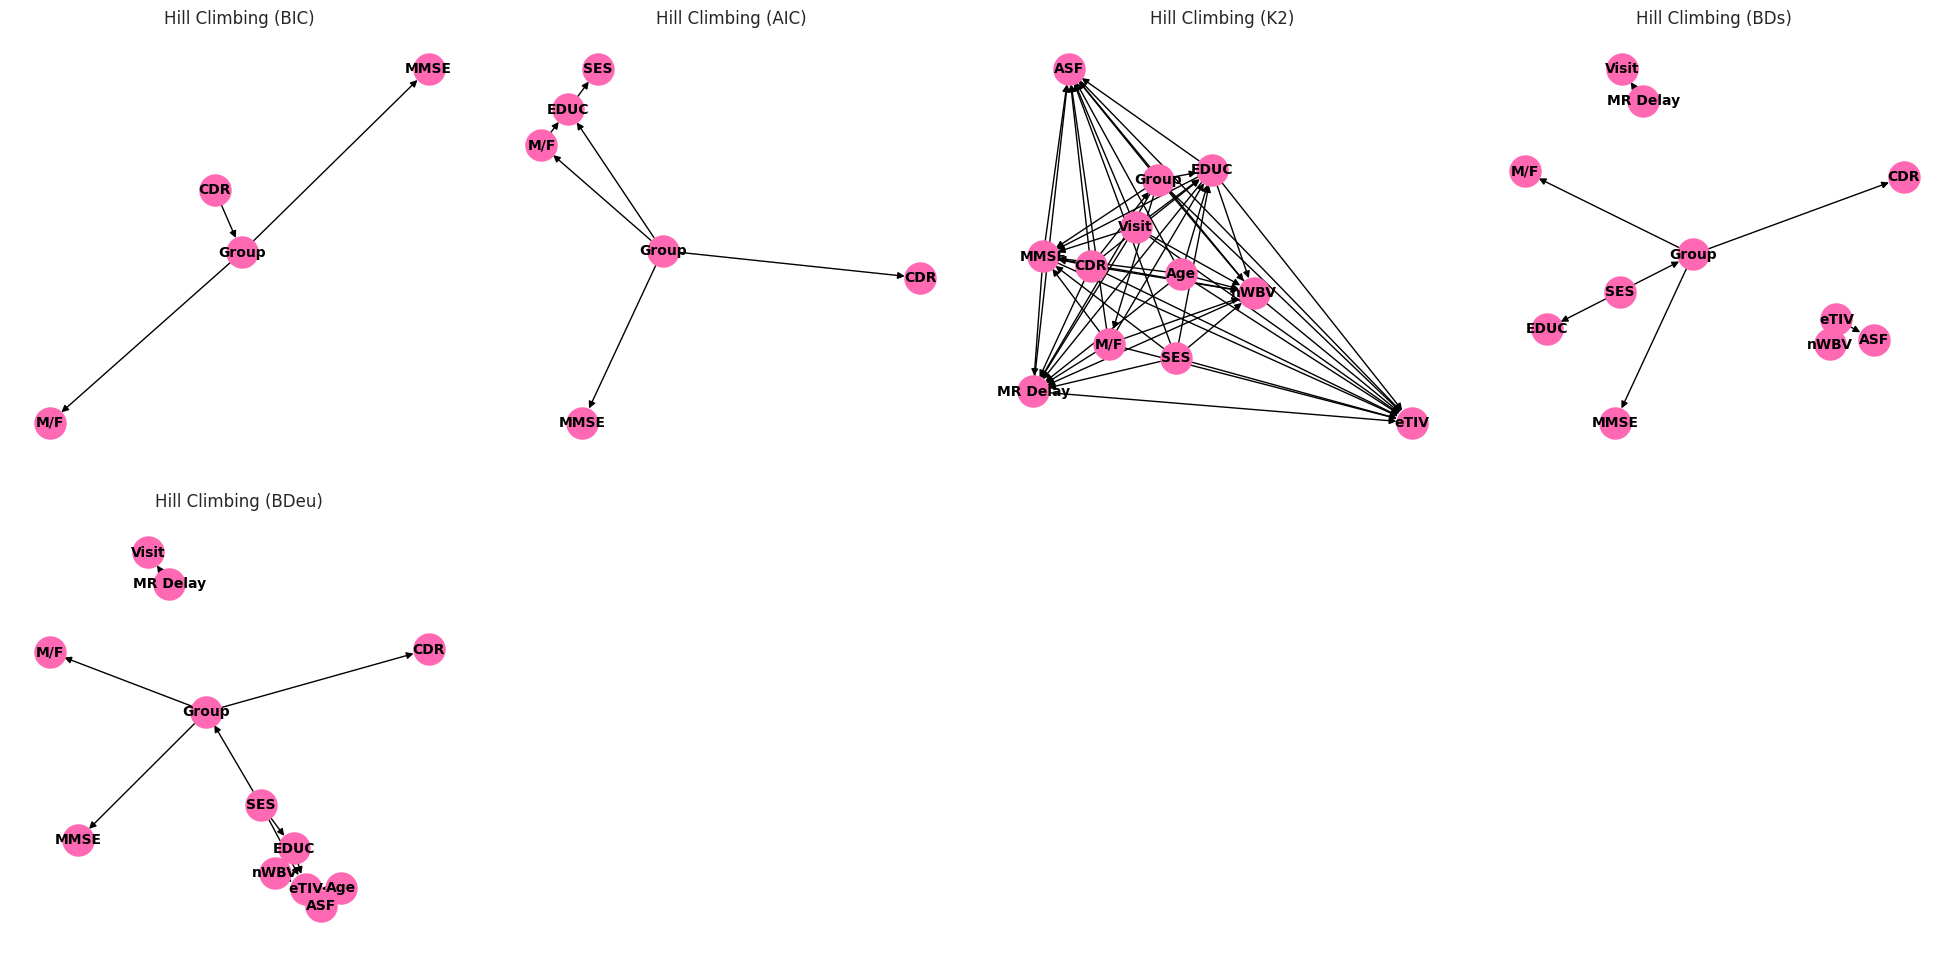

In [87]:
plot_bn_models(structures)

#### PC Algorithm
---

In [88]:
pc = PC(data=train_df)

In [89]:
pc_model = pc.estimate()
structures['PC Algorithm'] = pc_model

  0%|          | 0/5 [00:00<?, ?it/s]

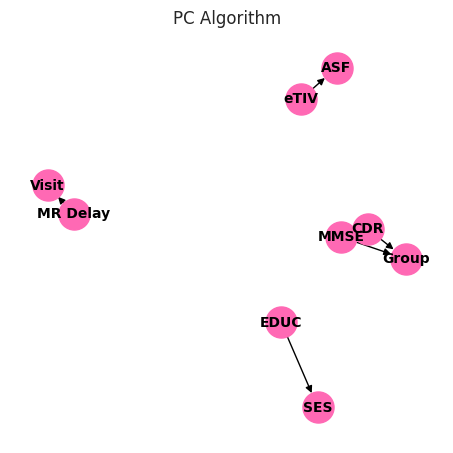

In [90]:
plot_bn_models({'PC Algorithm': structures['PC Algorithm']}, max_columns=1)

### Converting to Bayesian Network Objects
---

In [91]:
from pgmpy.models import BayesianNetwork

In [92]:
learned_models = {}

In [93]:
for title, dag in structures.items():
    learned_models[title] = BayesianNetwork(dag.edges())

### Parameter Learning
---

In [94]:
from pgmpy.estimators import MaximumLikelihoodEstimator

In [95]:
failed = []
for title, model in learned_models.items():
    try:
        learned_models[title] = model.fit(df, estimator=MaximumLikelihoodEstimator)
    except MemoryError:
        print(f'Could not learn "{title}" parameters, ran out of memory.')
        failed.append(title)
for title in failed:
    del learned_models[title]

Could not learn "Hill Climbing (K2)" parameters, ran out of memory.


### Inference by Variable Elimination
---

In [96]:
from pgmpy.inference import VariableElimination

In [ ]:
#conf_matrix = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(10, 7))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=gradient_palette, xticklabels=['Nondemented', 'Demented'], yticklabels=['Nondemented', 'Demented'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()